In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import plotly.express as px


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [ ]:
dataset = pd.read_csv('youtube.csv',encoding= 'unicode_escape')

In [ ]:
dataset.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
dataset.shape

(995, 28)

In [ ]:
dataset[categorical_feature].isnull().sum()

Youtuber           0
category          46
Title              0
Country          122
Abbreviation     122
channel_type      30
created_month      5
dtype: int64

In [ ]:
dataset[numerical_feature].isnull().sum()

rank                                         0
subscribers                                  0
video views                                  0
uploads                                      0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_date                                 5
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment rate                          123
Urban_population                           123
Latitude                                   123
Longitude                                  123
dtype: int64

# Feature Engineering and Data Cleaning

In [ ]:
df = dataset.copy()

<Axes: >

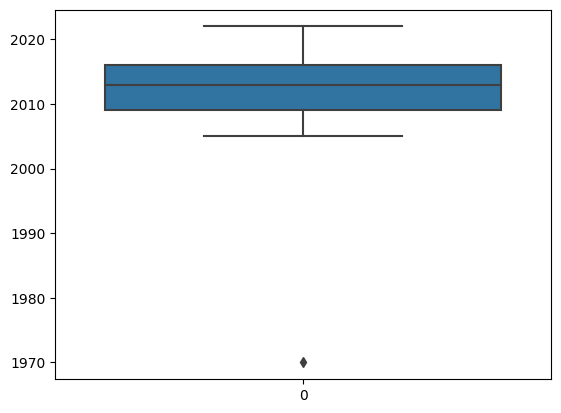

In [ ]:
sns.boxplot(df.created_year)

In [ ]:
# Drop Outlier
df[df.created_year==1970]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970.0,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


In [ ]:
df.drop(index=df[df.created_year==1970].index,axis=0,inplace=True)

**Now checking for uploads and video views columns****

In [ ]:
df[(df.uploads==0)&(df['video views']==0)]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
102,103,News,36300000,0.0,NaN,News,0,NaN,NaN,NaN,...,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,...,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
592,593,Live,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,...,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


**Droping the rows with uploads and video views both equal zero.**

In [ ]:
df.drop(index=df[(df.uploads==0)&(df['video views']==0)].index,axis=0,inplace=True)

In [ ]:
df[df.uploads==0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
57,58,BRIGHT SIDE,44500000,1.070853e+10,Howto & Style,brightside,0,NaN,NaN,NaN,...,1.0,2005.0,Nov,18.0,NaN,NaN,NaN,NaN,NaN,NaN
73,74,Luisito Comunica,40600000,8.670474e+09,Comedy,Luis Arturo Villar Sudek,0,Mexico,MX,Comedy,...,NaN,2010.0,Jun,18.0,40.2,1.260140e+08,3.42,102626859.0,23.634501,-102.552784
113,114,T-Series Apna Punjab,34600000,2.130632e+10,Music,T- Series Apna Punjab,0,NaN,NaN,News,...,NaN,2020.0,Jul,9.0,NaN,NaN,NaN,NaN,NaN,NaN
149,150,Luis Fonsi,31400000,1.517676e+10,Entertainment,luisfonsi,0,NaN,NaN,NaN,...,NaN,2006.0,Mar,31.0,NaN,NaN,NaN,NaN,NaN,NaN
166,167,Frost Diamond,30100000,7.277494e+09,Gaming,frostdiamond,0,NaN,NaN,NaN,...,6.0,2006.0,Aug,10.0,NaN,NaN,NaN,NaN,NaN,NaN
180,181,Aditya Music India,28500000,2.585799e+10,Music,Aditya Music,0,NaN,NaN,Music,...,NaN,2010.0,Dec,16.0,NaN,NaN,NaN,NaN,NaN,NaN
190,191,Sandeep Maheshwari,27800000,2.303069e+09,People & Blogs,Sandeepmaheshwari,0,Singapore,SG,NaN,...,1.0,2008.0,Jan,2.0,84.8,5.703569e+06,4.11,5703569.0,1.352083,103.819836
217,218,1MILLION Dance Studio,26100000,7.886440e+09,Entertainment,1MILLION Dance Studio,0,Saudi Arabia,SA,Music,...,NaN,2019.0,Jul,13.0,68.0,3.426853e+07,5.93,28807838.0,23.885942,45.079162
226,227,Fede Vigevani,25600000,7.962726e+09,Howto & Style,Fede Vigevani,0,NaN,NaN,NaN,...,2.0,2019.0,Aug,1.0,NaN,NaN,NaN,NaN,NaN,NaN
236,237,Chris Brown,25200000,1.552057e+10,Music,ChrisBrown,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['video views']==0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
18,19,Sports,75000000,0.0,NaN,sports,3,United States,US,Entertainment,...,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
173,174,Popular on YouTube,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,...,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(index=df[df.uploads==0].index,axis=0,inplace=True)
df.drop(index=df[df['video views']==0].index,axis=0,inplace=True)

In [ ]:
df.shape

(948, 28)

In [ ]:
df[(df.category.isnull())&(df.channel_type.isnull())]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
445,446,Busy Fun Ltd,18800000,7.762077e+09,NaN,TG MAYANK YT,2,NaN,NaN,NaN,...,NaN,2021.0,Dec,21.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(index=df[(df.category.isnull())&(df.channel_type.isnull())].index,axis=0,inplace=True)

In [ ]:
df.category.isnull().sum()

38

In [ ]:
df.category.unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       nan, 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [ ]:
df.channel_type.unique()

array(['Music', 'Entertainment', 'Education', 'People', 'Sports', 'Film',
       'News', nan, 'Games', 'Comedy', 'Howto', 'Nonprofit', 'Autos',
       'Tech', 'Animals'], dtype=object)

In [ ]:
# filling the missing value in category columns
category_dict = {'Music':'Music','Games':'Gaming','Entertainment':'Entertainment','Education':'Education','People':'People & Blogs','Sports':'Sports',
                'Film':'Film & Animation','News':'News & Politics','Comedy':'Comedy','Howto':'Howto & Style','Nonprofit':'Nonprofits & Activism',
                'Autos':'Autos & Vehicles','Tech':'Science & Technology','Animals':'Pets & Animals'}

In [ ]:
category_null_index=df[df.category.isnull()].index

In [ ]:
df['category'][category_null_index] = df.loc[category_null_index,'channel_type'].apply(lambda x: category_dict[x])

<ipython-input-29-076f7c34202e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'][category_null_index] = df.loc[category_null_index,'channel_type'].apply(lambda x: category_dict[x])


In [ ]:
df.category.isnull().sum()

0

In [ ]:
df.created_month.isnull().sum(),df.created_year.isnull().sum(),df.created_date.isnull().sum()

(0, 0, 0)

In [ ]:
print(df.Country.unique())
len(df.Country.unique())

['India' 'United States' 'Japan' 'Russia' 'South Korea' nan
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Australia' 'Italy'
 'Germany' 'France' 'Sweden' 'Ukraine' 'Latvia' 'Switzerland' 'Vietnam'
 'Malaysia' 'China' 'Iraq' 'Singapore' 'Egypt' 'Andorra' 'Ecuador'
 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']


49

In [ ]:
df.Country.fillna('Global',inplace=True)

In [ ]:
month_dict = {
        'Jan':1,
        'Feb':2,
        'Mar':3,
        'Apr':4,
        'May':5,
        'Jun':6,
        'Jul':7,
        'Aug':8,
        'Sep':9,
        'Oct':10,
        'Nov':11,
        'Dec':12}
df['created_month'] = df['created_month'].map(month_dict)

# new feature to create full date of joining youtube
df['full_date_of_creartion'] = pd.to_datetime({'year':df['created_year'],'month':df['created_month'],'day':df['created_date']})

current_time = pd.to_datetime({'year':[2023],'month':[8],'day':[1]},format='%Y#%m#%d')

# new feature to record the total day on youtube
df['total_day_on_youtube']= df['full_date_of_creartion'].apply(lambda x: current_time - x)
df['total_day_on_youtube']= df['total_day_on_youtube'].astype(str)
df['total_day_on_youtube']=df['total_day_on_youtube'].apply(lambda x: x.split(' ')[0])
df['total_day_on_youtube'] = df['total_day_on_youtube'].astype(float)

# new feature to record the total month on youtube
df['total_month_on_youtube']=(df['total_day_on_youtube']/30)

# new feature to record the total month on youtube
df['total_year_on_youtube']=(df['total_day_on_youtube']/365)

# new feature to record to upload per month
df['Upload_per_month'] = (df['uploads']/df['total_month_on_youtube']).astype(int)

# new feature to record to upload per month
df['Upload_per_year'] = (df['uploads']/df['total_year_on_youtube']).astype(int)

# Now removing the data with Upload per year less than 12

df.drop(index=df[df.Upload_per_year<12].index,axis=0,inplace=True)

In [ ]:
# average monthly income and average yearly income
df['avg_monthly'] = (df.lowest_monthly_earnings+df.highest_monthly_earnings)/2
df['avg_yearly'] = (df.lowest_yearly_earnings+df.highest_yearly_earnings)/2

In [ ]:
df.category.value_counts()

Entertainment            211
Music                    136
People & Blogs           117
Gaming                    84
Comedy                    60
Education                 42
Film & Animation          38
Howto & Style             37
News & Politics           24
Science & Technology      14
Shows                     12
Sports                    12
Pets & Animals             3
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: category, dtype: int64

In [ ]:
#### now taking top 8 most common caegory
best_cat = df.category.value_counts().sort_values(ascending=False)[:8].index

category_count_per_year=df.groupby('created_year').category.value_counts().to_dict()

year_list = []
category_list = []
freq_list = []
for key,val in category_count_per_year.items():
    year_list.append(key[0])
    category_list.append(key[1])
    freq_list.append(val)

popular_category_count_per_year = pd.DataFrame({'created_year': year_list,
                       'category':category_list,
                       'no_of_created':freq_list})

world_events = df.groupby('created_year')['Urban_population','Population','Gross tertiary education enrollment (%)','Unemployment rate'].mean()

world_events.reset_index(inplace=True)

category_with_world_event = pd.merge(popular_category_count_per_year,world_events,on='created_year')


<ipython-input-37-a9d3a88a07e8>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world_events = df.groupby('created_year')['Urban_population','Population','Gross tertiary education enrollment (%)','Unemployment rate'].mean()


In [ ]:
map_dict={'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Argentina': 'ARG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo, Dem. Rep.': 'COD',
 'Congo, Rep.': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Czech Republic': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Eritrea': 'ERI',
 'Ethiopia': 'ETH',
 'Finland': 'FIN',
 'France': 'FRA',
 'Gabon': 'GAB',
 'Gambia': 'GMB',
 'Germany': 'DEU',
 'Ghana': 'GHA',
 'Greece': 'GRC',
 'Guatemala': 'GTM',
 'Guinea': 'GIN',
 'Guinea-Bissau': 'GNB',
 'Haiti': 'HTI',
 'Honduras': 'HND',
 'Hong Kong, China': 'HKG',
 'Hungary': 'HUN',
 'Iceland': 'ISL',
 'India': 'IND',
 'Indonesia': 'IDN',
 'Iran': 'IRN',
 'Iraq': 'IRQ',
 'Ireland': 'IRL',
 'Israel': 'ISR',
 'Italy': 'ITA',
 'Jamaica': 'JAM',
 'Japan': 'JPN',
 'Jordan': 'JOR',
 'Kenya': 'KEN',
 'Korea, Dem. Rep.': 'KOR',
 'Korea, Rep.': 'KOR',
 'Kuwait': 'KWT',
 'Lebanon': 'LBN',
 'Lesotho': 'LSO',
 'Liberia': 'LBR',
 'Libya': 'LBY',
 'Madagascar': 'MDG',
 'Malawi': 'MWI',
 'Malaysia': 'MYS',
 'Mali': 'MLI',
 'Mauritania': 'MRT',
 'Mauritius': 'MUS',
 'Mexico': 'MEX',
 'Mongolia': 'MNG',
 'Montenegro': 'MNE',
 'Morocco': 'MAR',
 'Mozambique': 'MOZ',
 'Myanmar': 'MMR',
 'Namibia': 'NAM',
 'Nepal': 'NPL',
 'Netherlands': 'NLD',
 'New Zealand': 'NZL',
 'Nicaragua': 'NIC',
 'Niger': 'NER',
 'Nigeria': 'NGA',
 'Norway': 'NOR',
 'Oman': 'OMN',
 'Pakistan': 'PAK',
 'Panama': 'PAN',
 'Paraguay': 'PRY',
 'Peru': 'PER',
 'Philippines': 'PHL',
 'Poland': 'POL',
 'Portugal': 'PRT',
 'Puerto Rico': 'PRI',
 'Reunion': 'REU',
 'Romania': 'ROU',
 'Rwanda': 'RWA',
 'Sao Tome and Principe': 'STP',
 'Saudi Arabia': 'SAU',
 'Senegal': 'SEN',
 'Serbia': 'SRB',
 'Sierra Leone': 'SLE',
 'Singapore': 'SGP',
 'Slovak Republic': 'SVK',
 'Slovenia': 'SVN',
 'Somalia': 'SOM',
 'South Africa': 'ZAF',
 'Spain': 'ESP',
 'Sri Lanka': 'LKA',
 'Sudan': 'SDN',
 'Swaziland': 'SWZ',
 'Sweden': 'SWE',
 'Switzerland': 'CHE',
 'Syria': 'SYR',
 'Taiwan': 'TWN',
 'Tanzania': 'TZA',
 'Thailand': 'THA',
 'Togo': 'TGO',
 'Trinidad and Tobago': 'TTO',
 'Tunisia': 'TUN',
 'Turkey': 'TUR',
 'Uganda': 'UGA',
 'United Kingdom': 'GBR',
 'United States': 'USA',
 'Uruguay': 'URY',
 'Venezuela': 'VEN',
 'Vietnam': 'VNM',
 'West Bank and Gaza': 'PSE',
 'Yemen, Rep.': 'YEM',
 'Zambia': 'ZMB',
 'Zimbabwe': 'ZWE'}

#name Country_code
df['Country_code'] = df.Country.map(map_dict)

In [ ]:
### Successful Youtuber based on Number of of subscribers and  highly avg_yearly income.
successful_youtuber = df[(df.subscribers>=df.subscribers.quantile(0.75)) &(df.avg_yearly>=df.avg_yearly.quantile(0.75))].copy()

In [ ]:
category_with_world_event.head()

,created_year,category,no_of_created,Urban_population,Population,Gross tertiary education enrollment (%),Unemployment rate
0,2005.0,Entertainment,3,2.322795e+08,3.952384e+08,75.442857,10.724286
1,2005.0,Music,3,2.322795e+08,3.952384e+08,75.442857,10.724286
2,2005.0,People & Blogs,2,2.322795e+08,3.952384e+08,75.442857,10.724286
3,2005.0,Comedy,1,2.322795e+08,3.952384e+08,75.442857,10.724286
4,2005.0,Gaming,1,2.322795e+08,3.952384e+08,75.442857,10.724286


# EDA Analysis

<Axes: xlabel='category,Upload_per_month'>

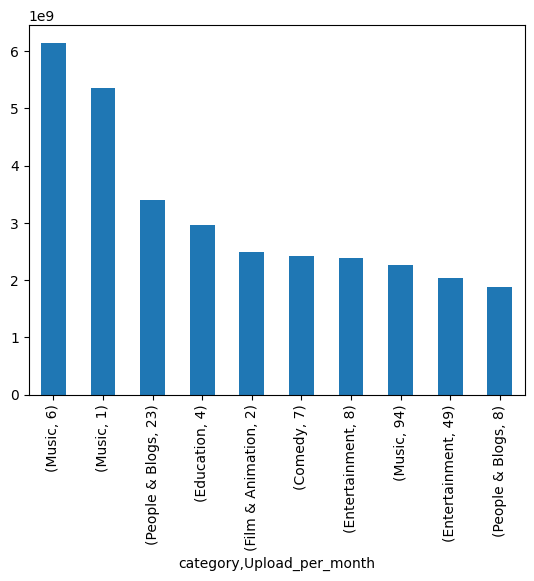

In [ ]:
df.groupby(['category','Upload_per_month'])['video_views_for_the_last_30_days'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In This Dataset, The Youtube channel with the **Music Category** and **video upload per month 6** gets more views in the **last 30 days**.

In [ ]:
df[(df.category=='Music') & (df.Upload_per_month==6)]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,Longitude,full_date_of_creartion,total_day_on_youtube,total_month_on_youtube,total_year_on_youtube,Upload_per_month,Upload_per_year,avg_monthly,avg_yearly,Country_code
455,456,Dan-Sa / Daniel Saboya,18500000,2.908121e+09,Music,Dan-Sa / Daniel Saboya,1329,Brazil,BR,Music,...,-51.92528,2007-09-22,5792.0,193.066667,15.868493,6,83,0.0,0.0,BRA


<Axes: ylabel='Youtuber,Country,rank'>

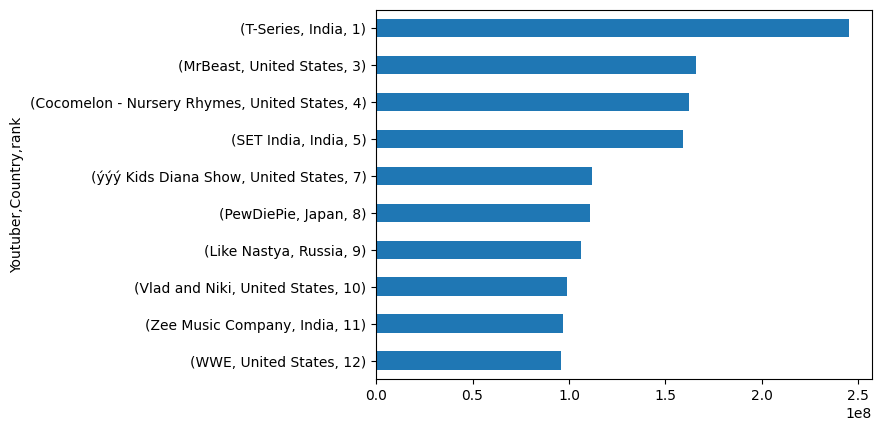

In [ ]:
df.groupby(['Youtuber','Country','rank'])['subscribers'].sum().sort_values(ascending=True)[-10:].plot(kind='barh')

In [ ]:
df.groupby(['Youtuber','Country','rank'])['subscribers'].sum().sort_values(ascending=False)[:10]

Youtuber                    Country        rank
T-Series                    India          1       245000000
MrBeast                     United States  3       166000000
Cocomelon - Nursery Rhymes  United States  4       162000000
SET India                   India          5       159000000
ýýý Kids Diana Show         United States  7       112000000
PewDiePie                   Japan          8       111000000
Like Nastya                 Russia         9       106000000
Vlad and Niki               United States  10       98900000
Zee Music Company           India          11       96700000
WWE                         United States  12       96000000
Name: subscribers, dtype: int64

From the above graph, it is clear that **T-Series India** is the **highest Regional Influencer**. These ten channels are the top **Regional Influencers**.

In [ ]:
index_of_top_regional_youtubers = df[['Youtuber','Country','subscribers','country_rank']].sort_values(by='subscribers',ascending=True)[-10:].index

<Axes: ylabel='Youtuber,Country'>

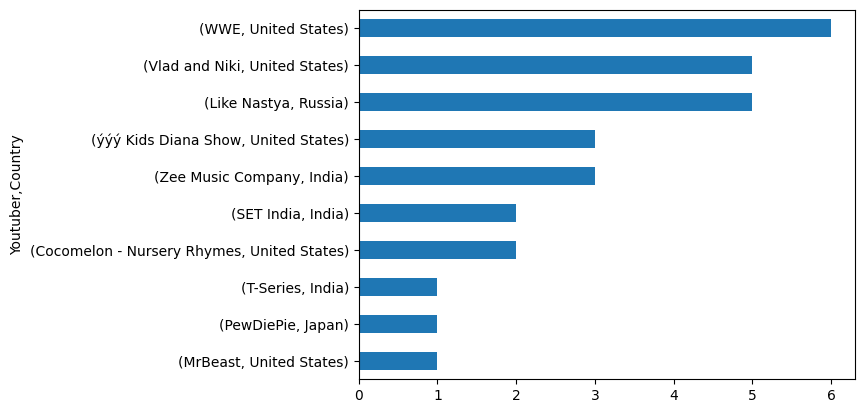

In [ ]:
popular_regional_youtubers = df.loc[index_of_top_regional_youtubers]
popular_regional_youtubers.groupby(['Youtuber','Country'])['country_rank'].sum().sort_values(ascending=True)[-10:].plot(kind='barh')

In [ ]:
popular_regional_youtubers.groupby(['Youtuber','Country'])['country_rank'].sum().sort_values(ascending=False)[0:10]

Youtuber                    Country      
WWE                         United States    6.0
Like Nastya                 Russia           5.0
Vlad and Niki               United States    5.0
Zee Music Company           India            3.0
ýýý Kids Diana Show         United States    3.0
Cocomelon - Nursery Rhymes  United States    2.0
SET India                   India            2.0
MrBeast                     United States    1.0
PewDiePie                   Japan            1.0
T-Series                    India            1.0
Name: country_rank, dtype: float64

From the above graph, it is clear that the  **WWE United States** is the **highest Global Influencer** among the **top ten Regional Influencers**.

In [ ]:
Earning_correalation = ['subscribers','video views','rank','video_views_rank','subscribers_for_last_30_days','video_views_for_the_last_30_days','channel_type_rank','country_rank','uploads','Upload_per_month']

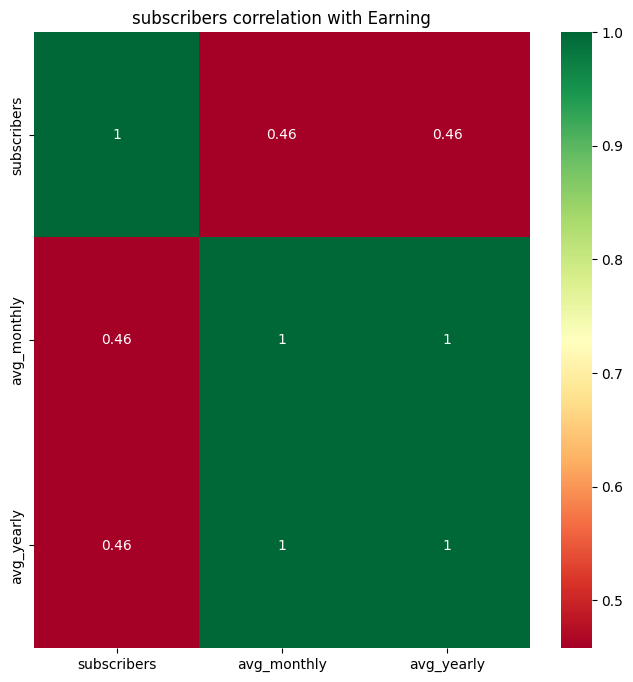

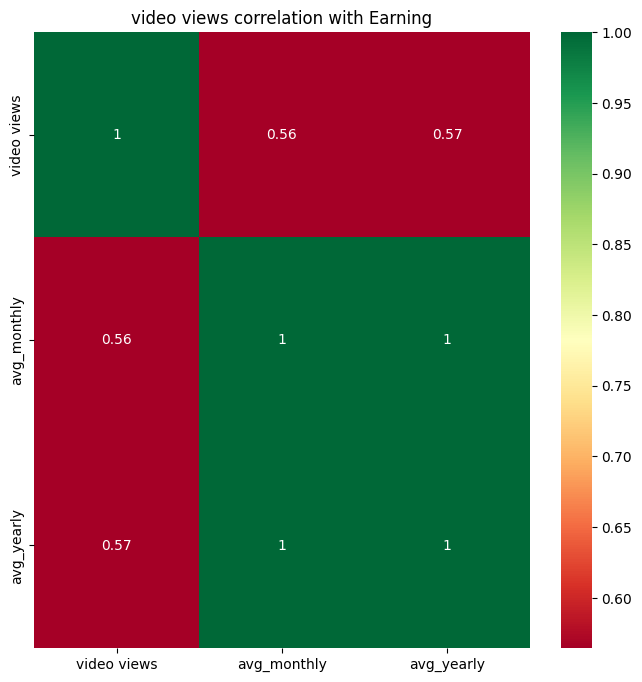

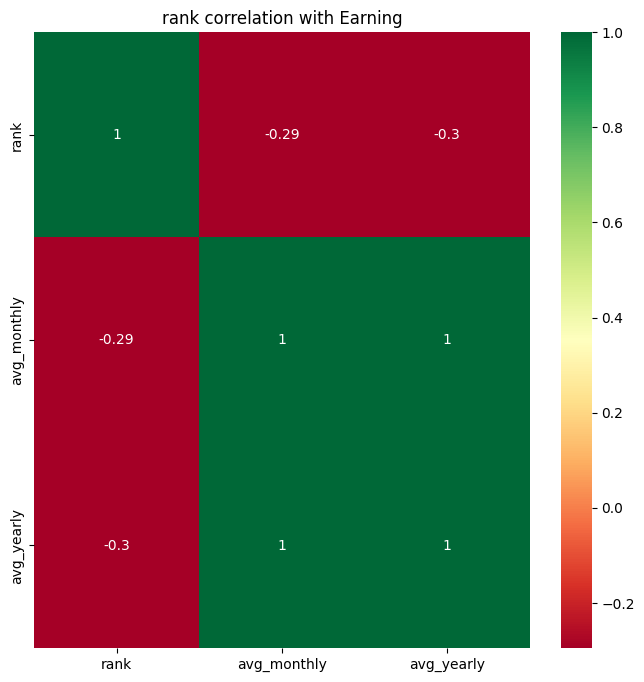

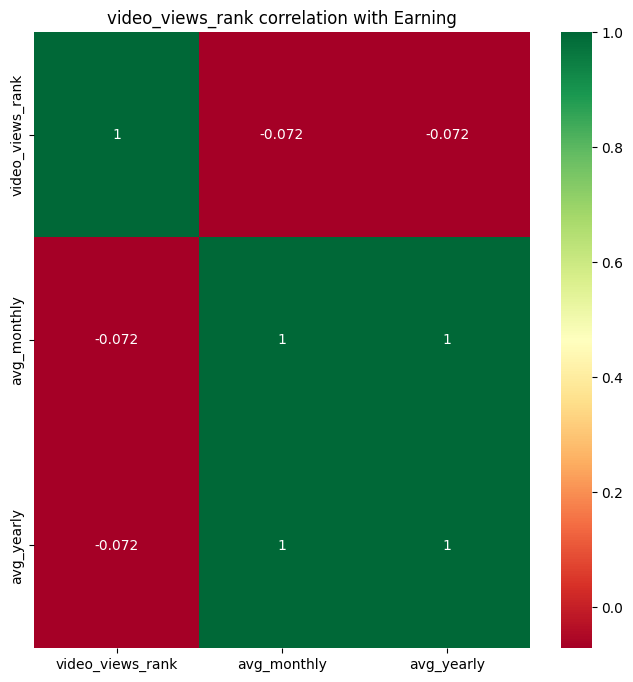

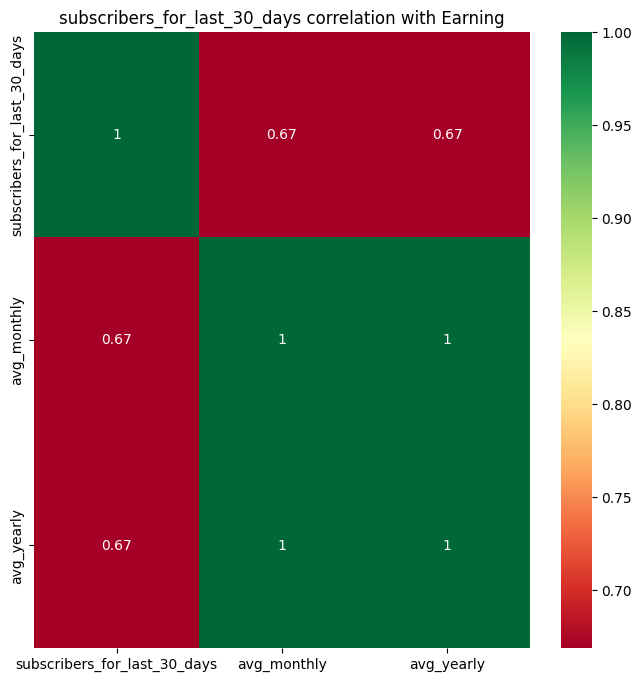

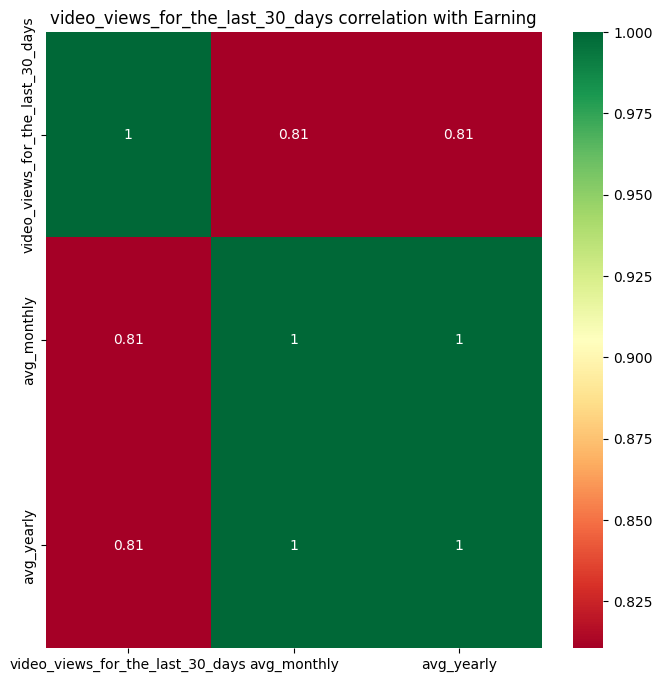

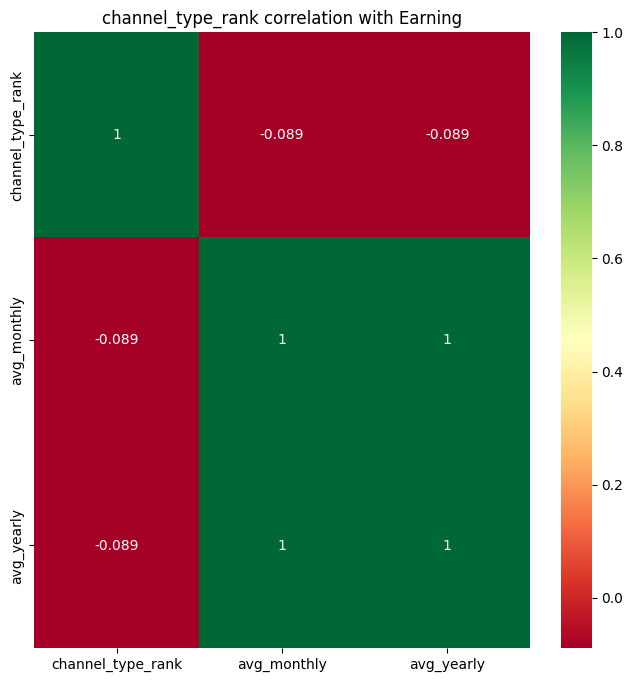

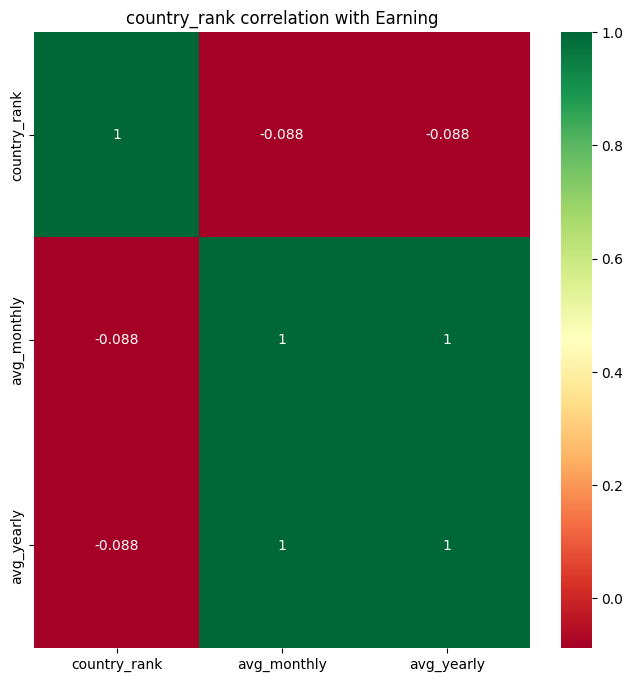

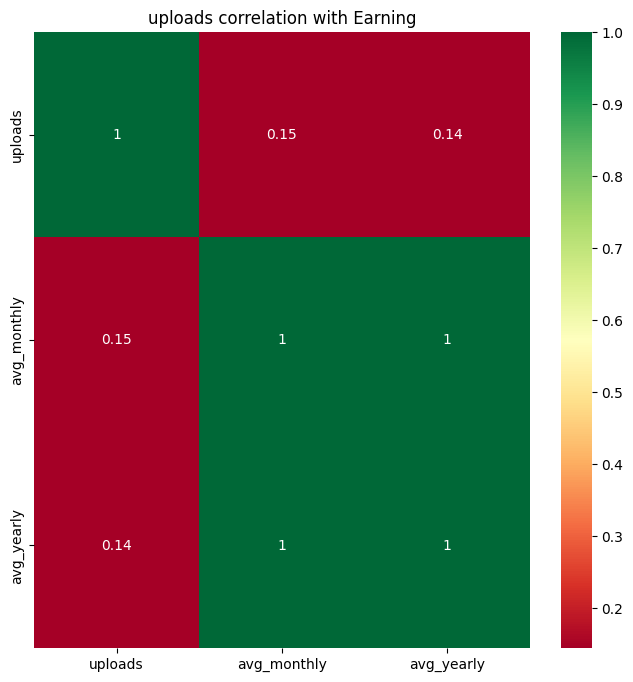

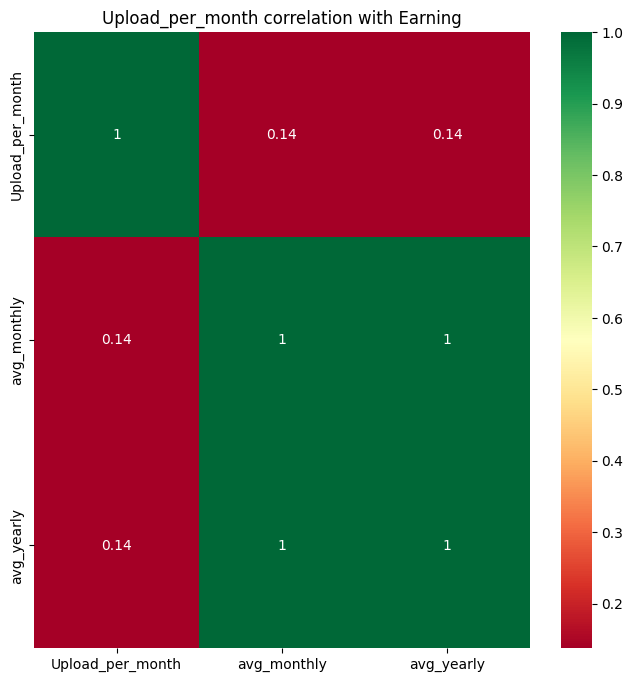

In [ ]:
import matplotlib.pyplot as plt

for val in Earning_correalation:
    plt.figure(figsize = (8,8))
    sns.heatmap(df[[val,'avg_monthly','avg_yearly']].corr(numeric_only=True), annot = True, cmap = "RdYlGn")
    plt.title(f'{val} correlation with Earning')
    plt.show()

From This above Correlation graph, it is clear that  **Subscribers**, **total views across all videos on the channel**, **video_views_fo_last_30_days** and  **subscribers_for_last_30_days** are **highly correlated** with the **average monthly** and the **average yearly income**.

In [ ]:
fig = px.choropleth(df, locations='Country_code',color='subscribers',
                    hover_name='Country'
                    )
fig.update_layout(title = 'World map', title_x=0.1)

fig.show()

From this map, it is clear that the top three Subscribers holder countries are:
1. **India** - **245 Millions**.
2. **USA**  - **166 Millions**
3. **Canada** - **71 Millions**

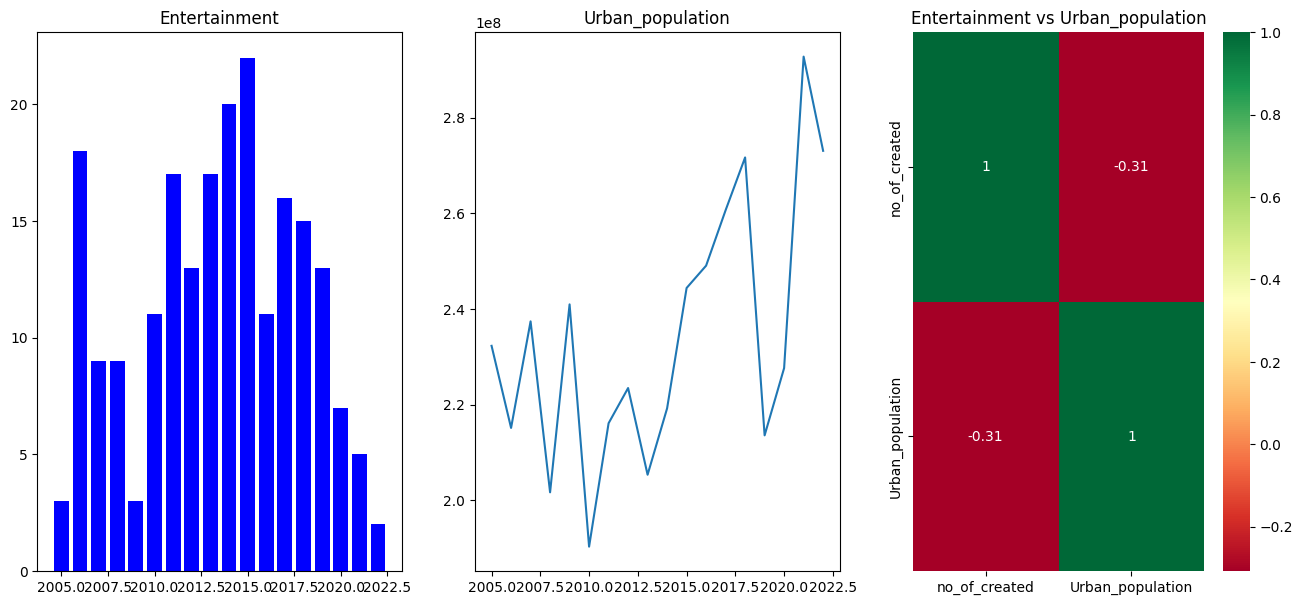

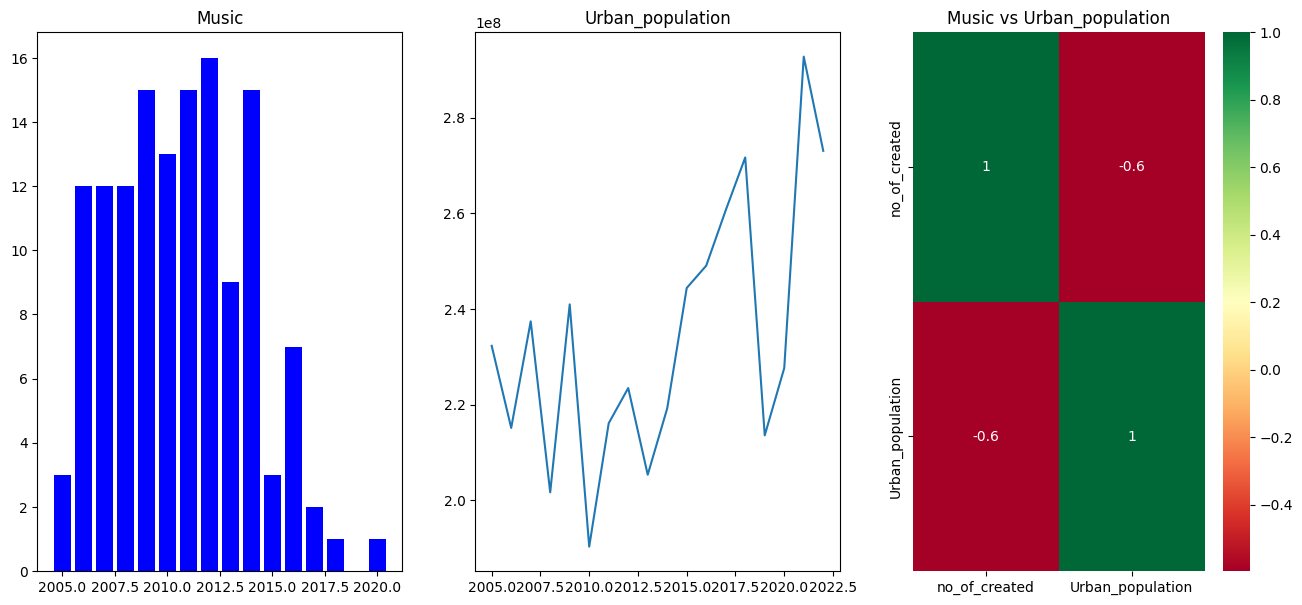

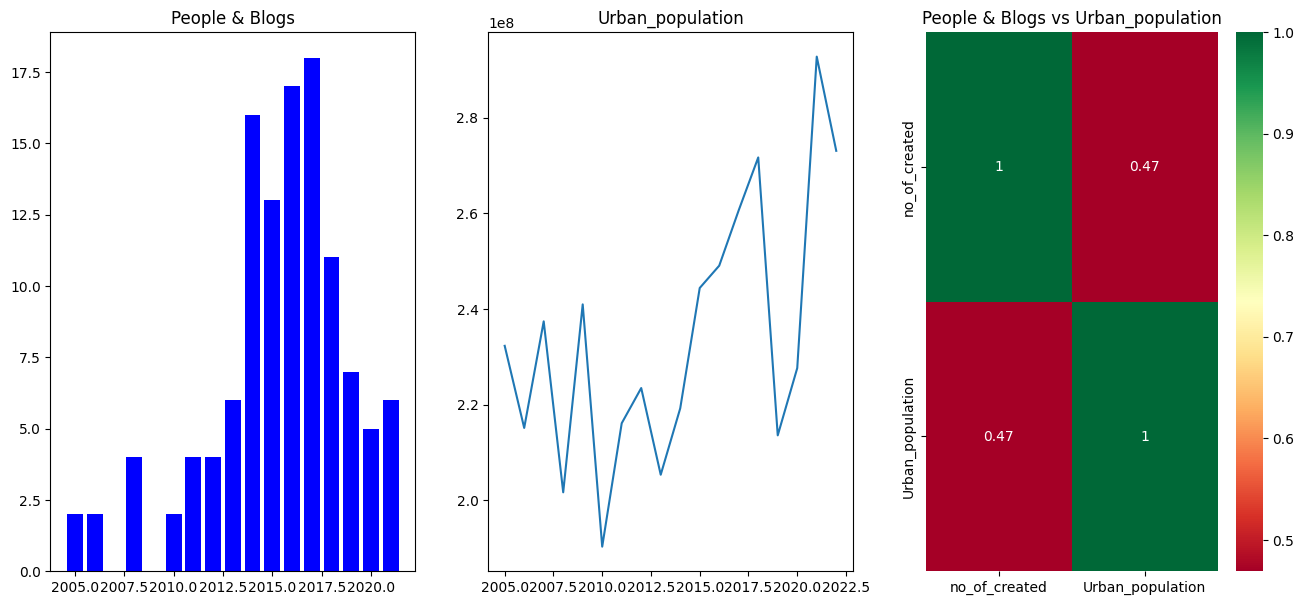

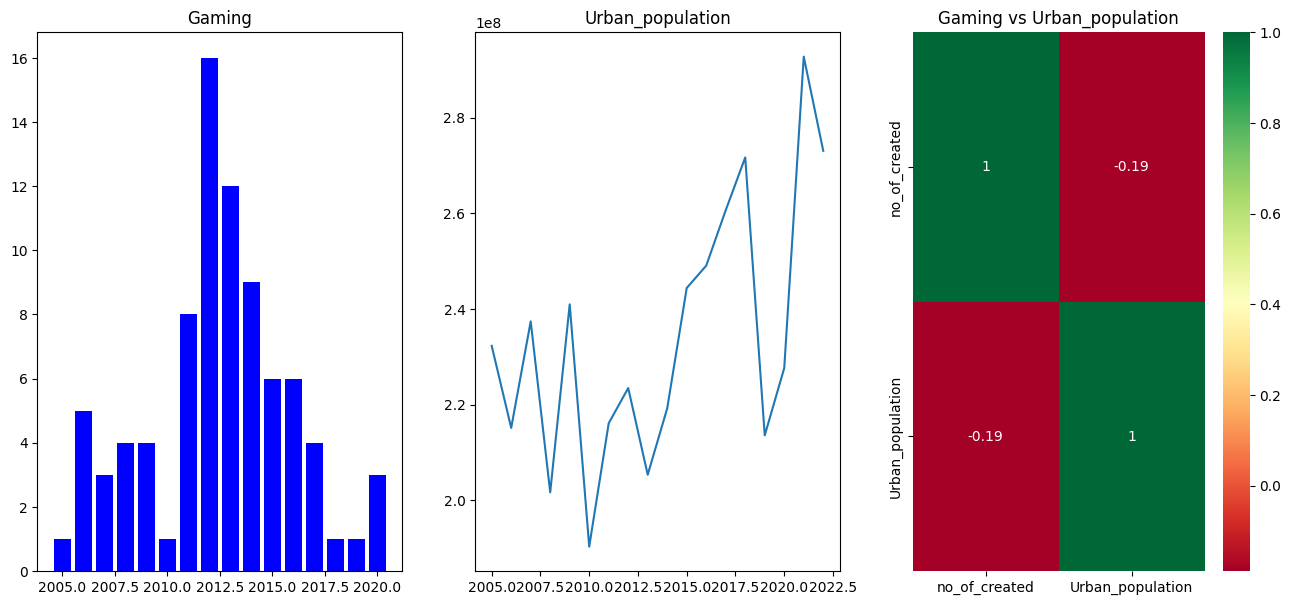

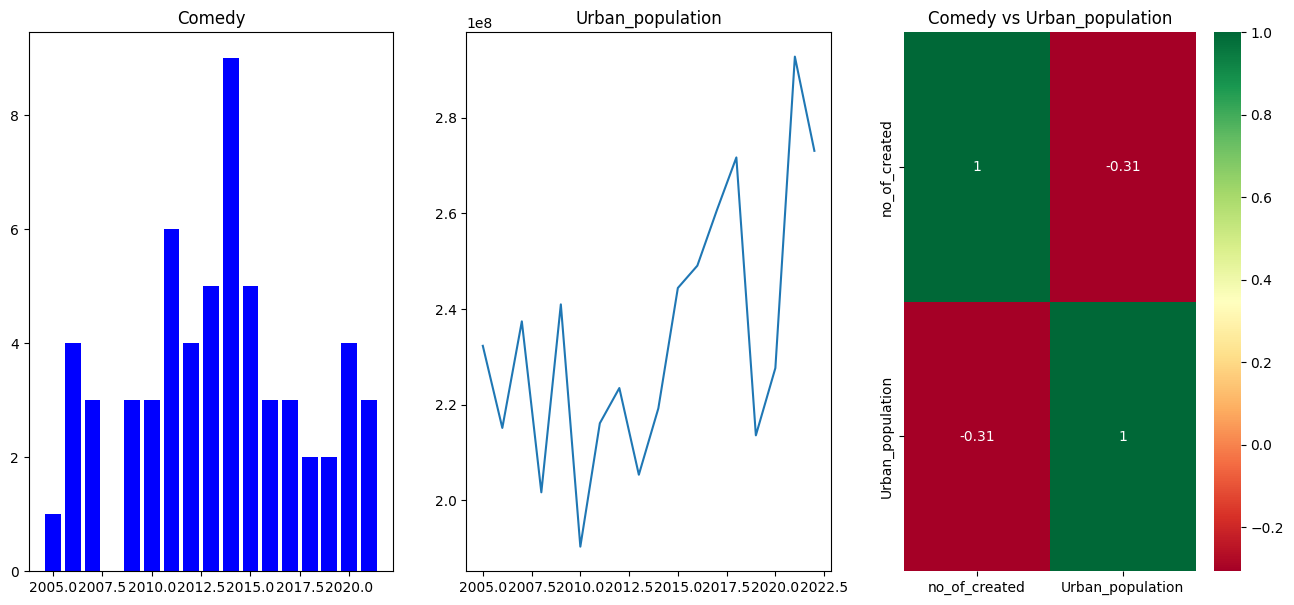

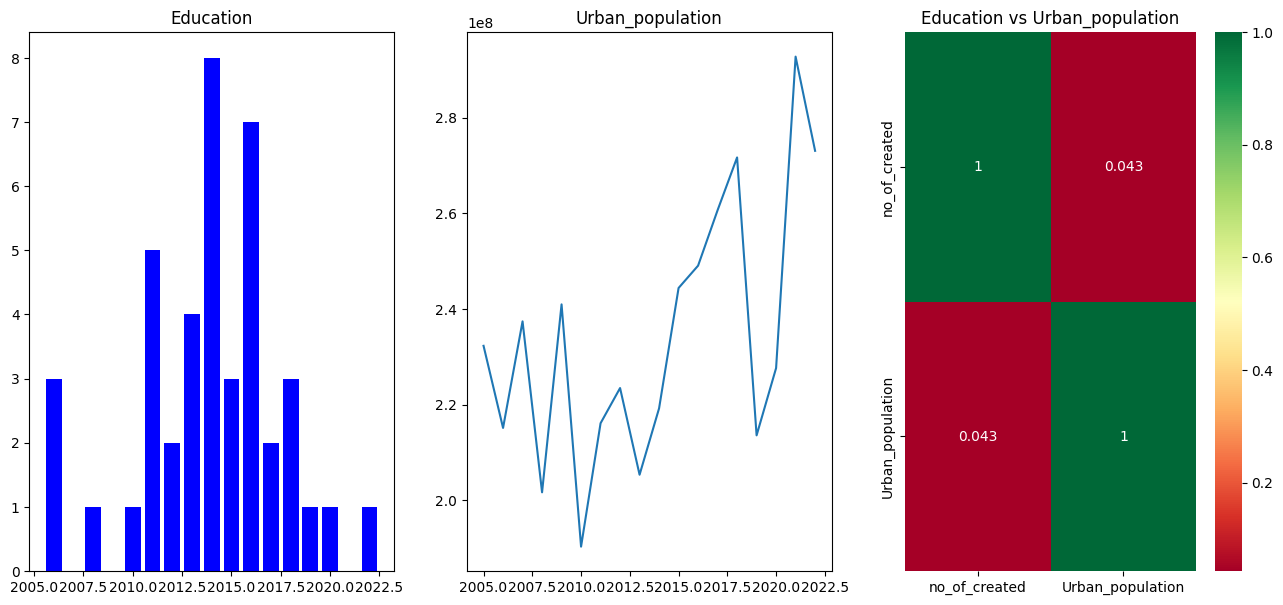

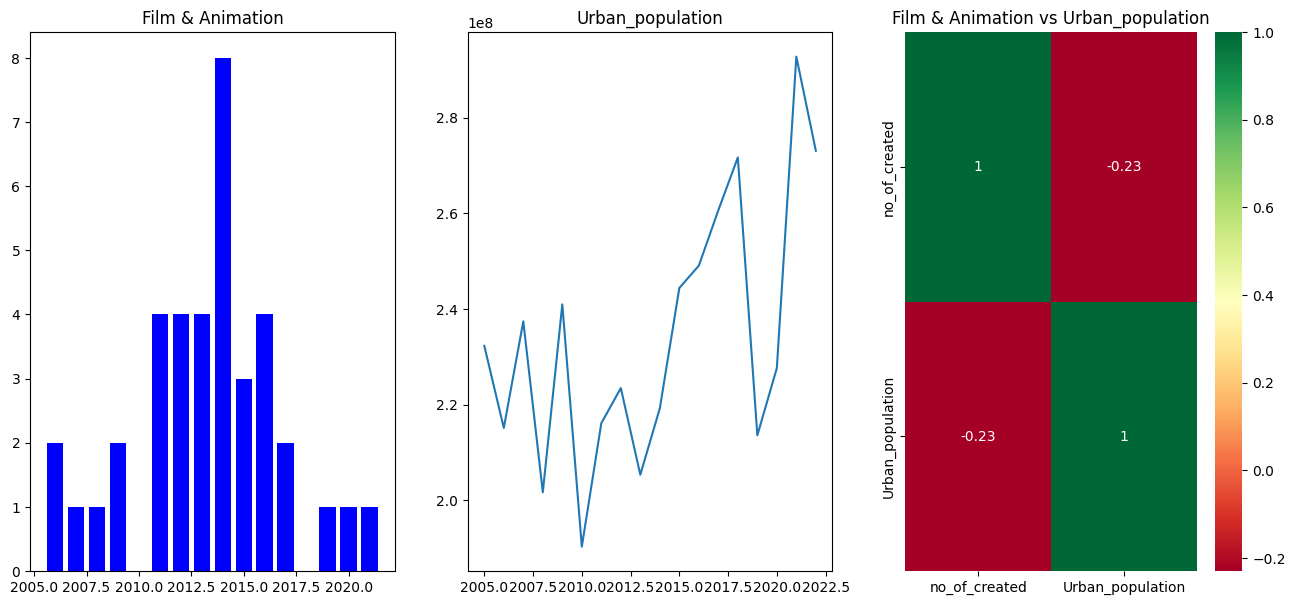

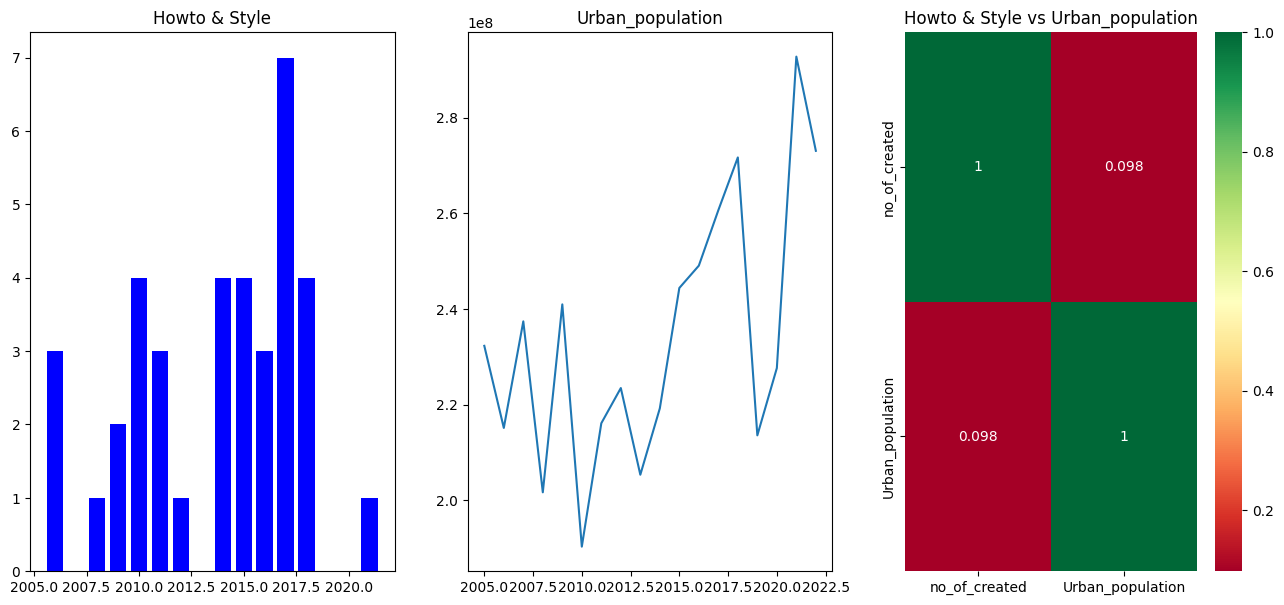

In [ ]:
for val in best_cat:
    plt.figure(figsize=(16,7))
    data_f = category_with_world_event[category_with_world_event.category==val].copy()
    plt.subplot(1,3,1)
    plt.bar(data_f.created_year,data_f.no_of_created,label=val,color='blue')
    plt.title(val)
    plt.subplot(1,3,2)
    plt.plot(category_with_world_event.created_year,category_with_world_event.Urban_population)
    plt.title('Urban_population')
    plt.subplot(1,3,3)
    d=data_f[['no_of_created','Urban_population']].corr(numeric_only=True)
    sns.heatmap(d, annot = True, cmap = "RdYlGn")
    plt.title(f'{val} vs Urban_population')
    plt.show()

From the above graph it is clear that:
1. The popularity of the **Entertainment category** is **negatively correlated** with the **Urban Population**.
2. The popularity of the **Music category** is **negatively correlated** with the **Urban Population**.
3. The popularity of the **Comedy category** is **negatively correlated** with the **Urban Population**.
4. The popularity of the **People & Blogs category** is **positively correlated** with the **Urban Population**.



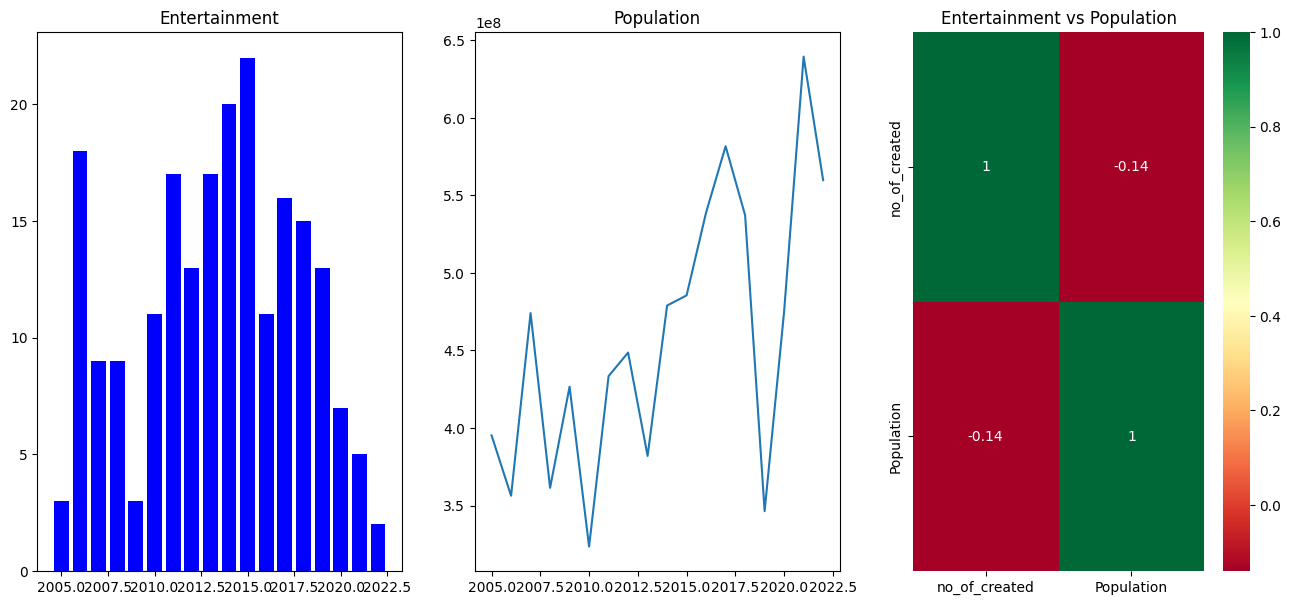

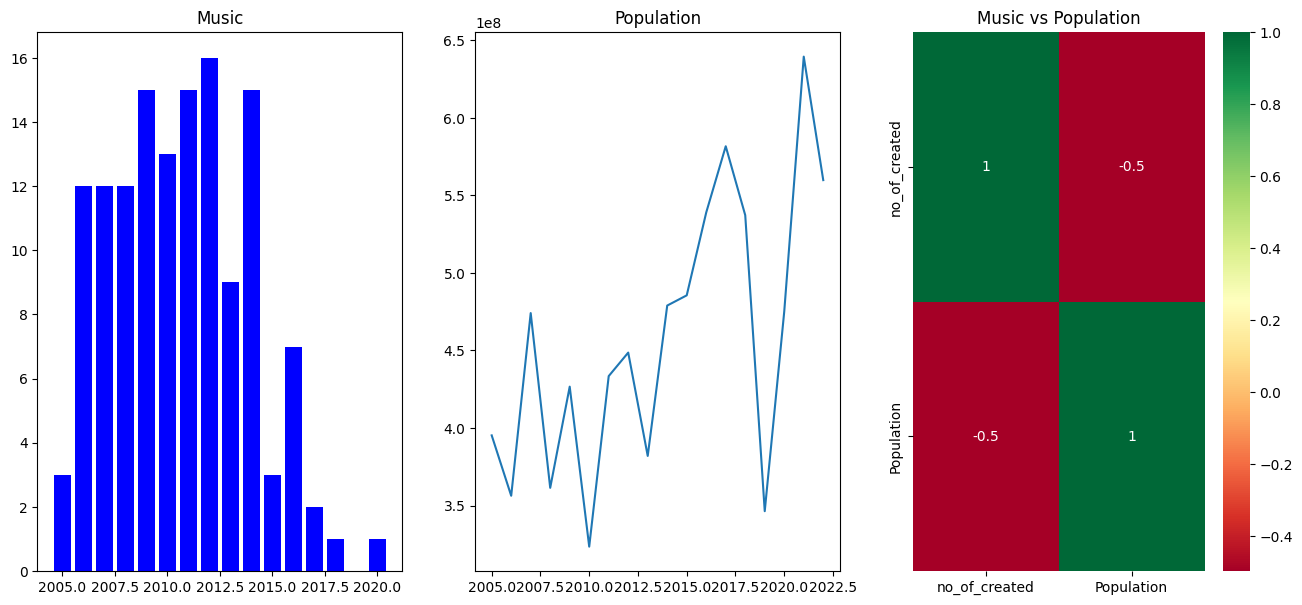

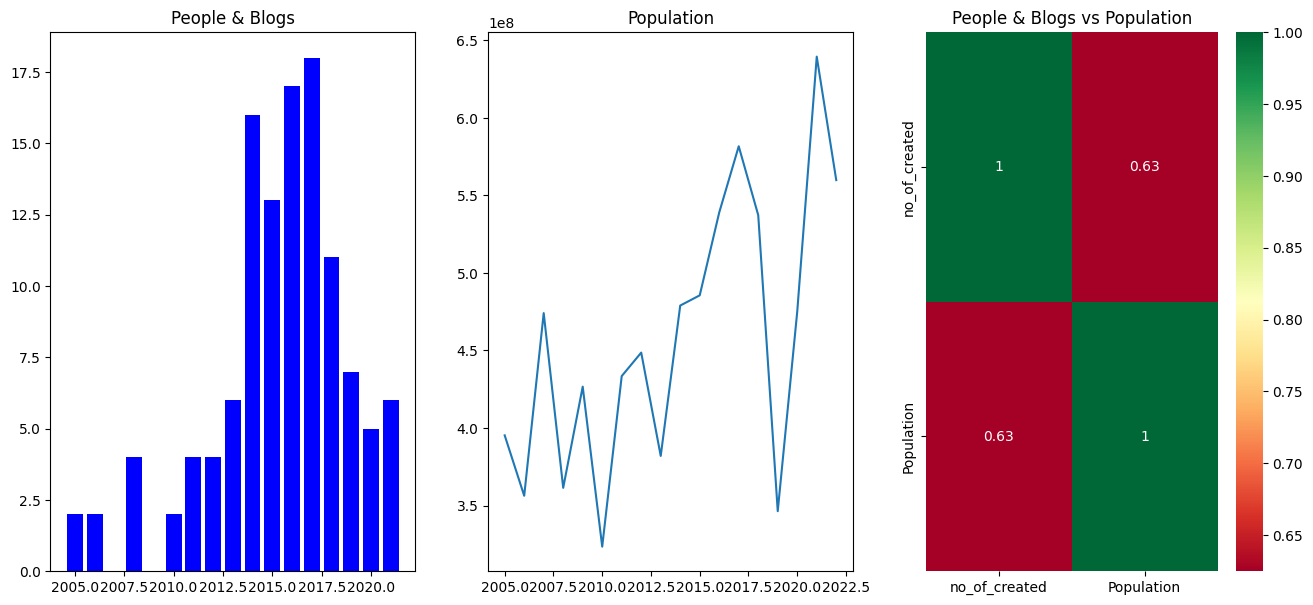

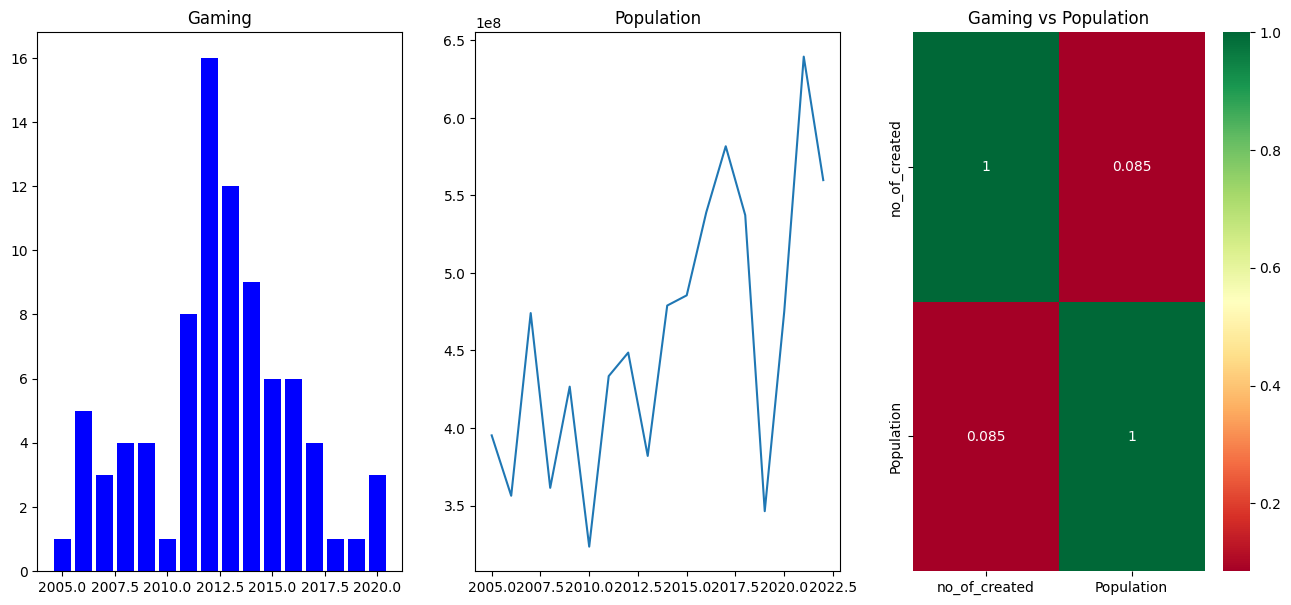

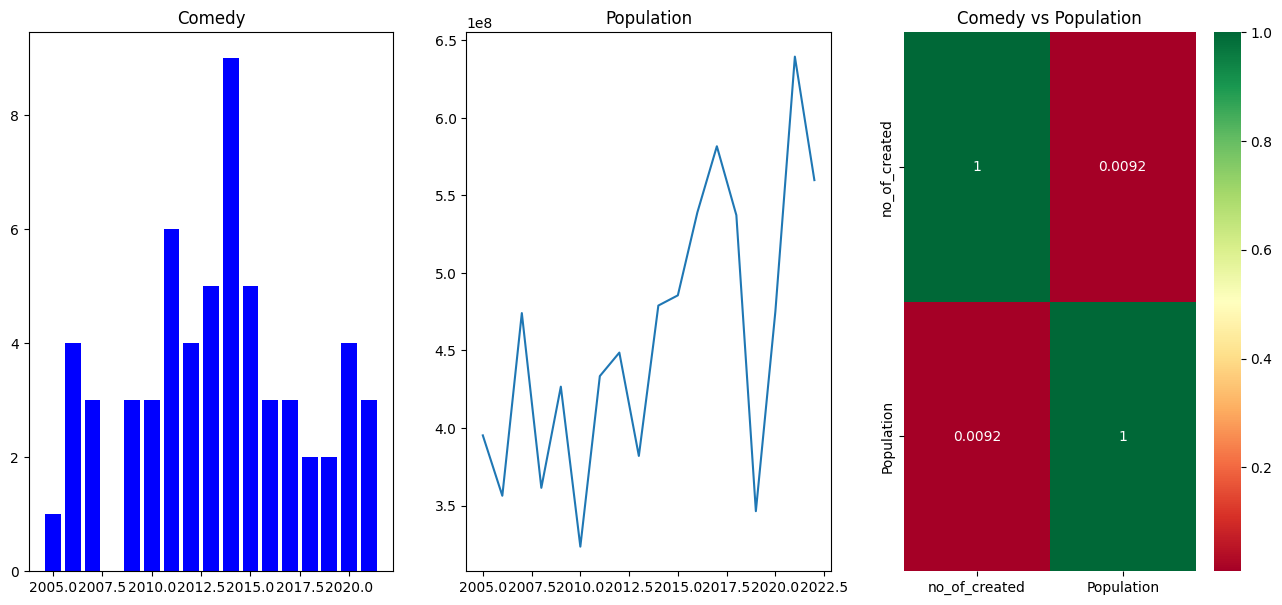

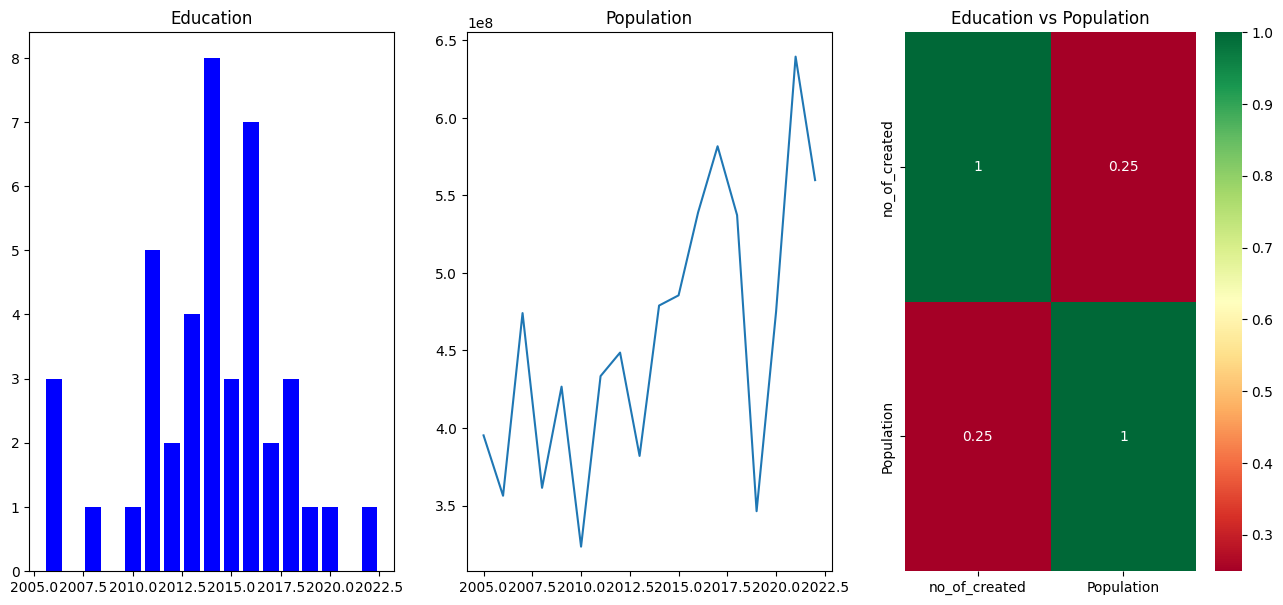

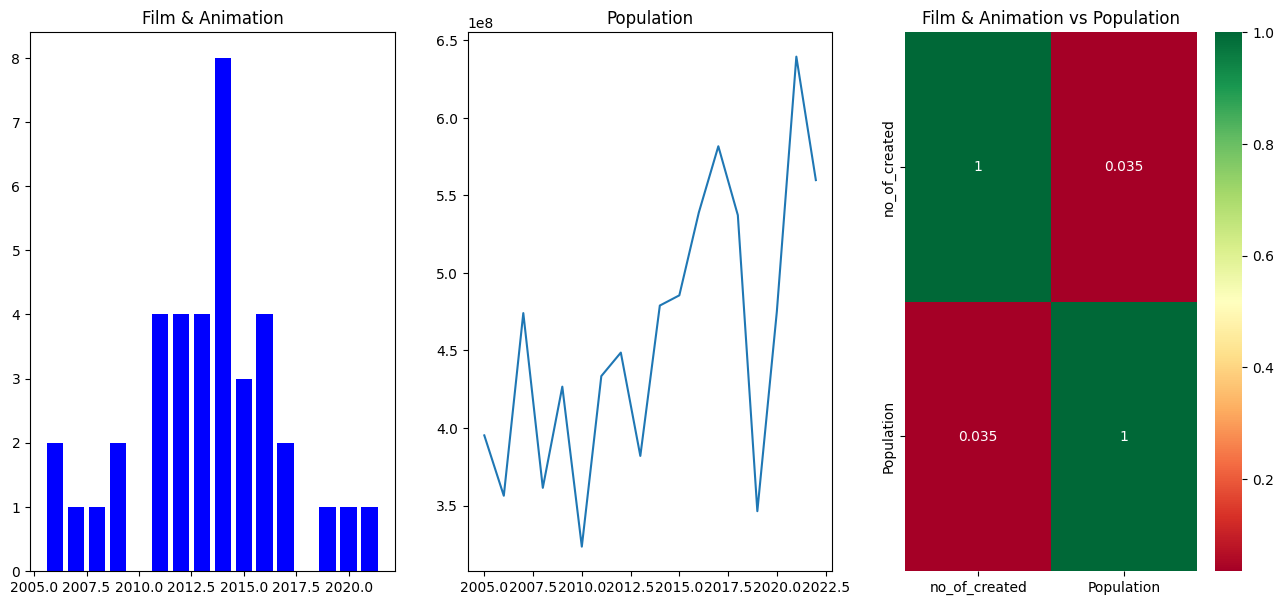

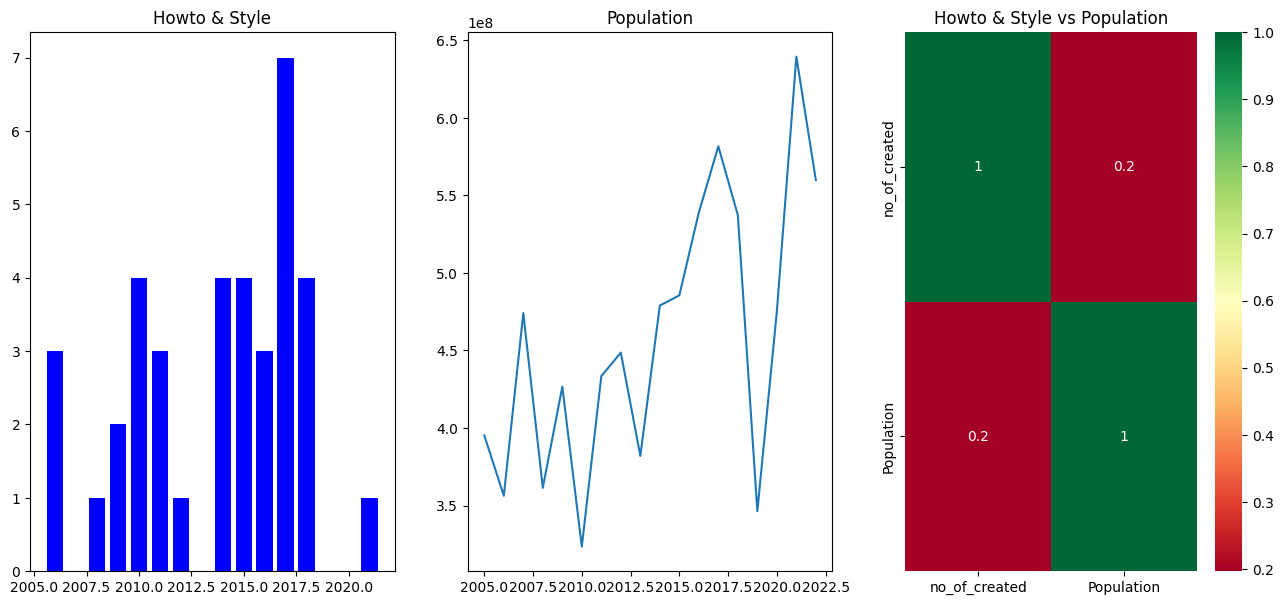

In [ ]:
for val in best_cat:
    plt.figure(figsize=(16,7))
    data_f = category_with_world_event[category_with_world_event.category==val].copy()
    plt.subplot(1,3,1)
    plt.bar(data_f.created_year,data_f.no_of_created,label=val,color='blue')
    plt.title(val)
    plt.subplot(1,3,2)
    plt.plot(category_with_world_event.created_year,category_with_world_event.Population)
    plt.title('Population')
    plt.subplot(1,3,3)
    d=data_f[['no_of_created','Population']].corr(numeric_only=True)
    sns.heatmap(d, annot = True, cmap = "RdYlGn")
    plt.title(f'{val} vs Population')
    plt.show()

From the above graph it is clear that:
1. The popularity of the **Music category** is **negatively correlated** with the **Population**.
2. The popularity of the **People & Blogs category** is **positively correlated** with the **Population**.

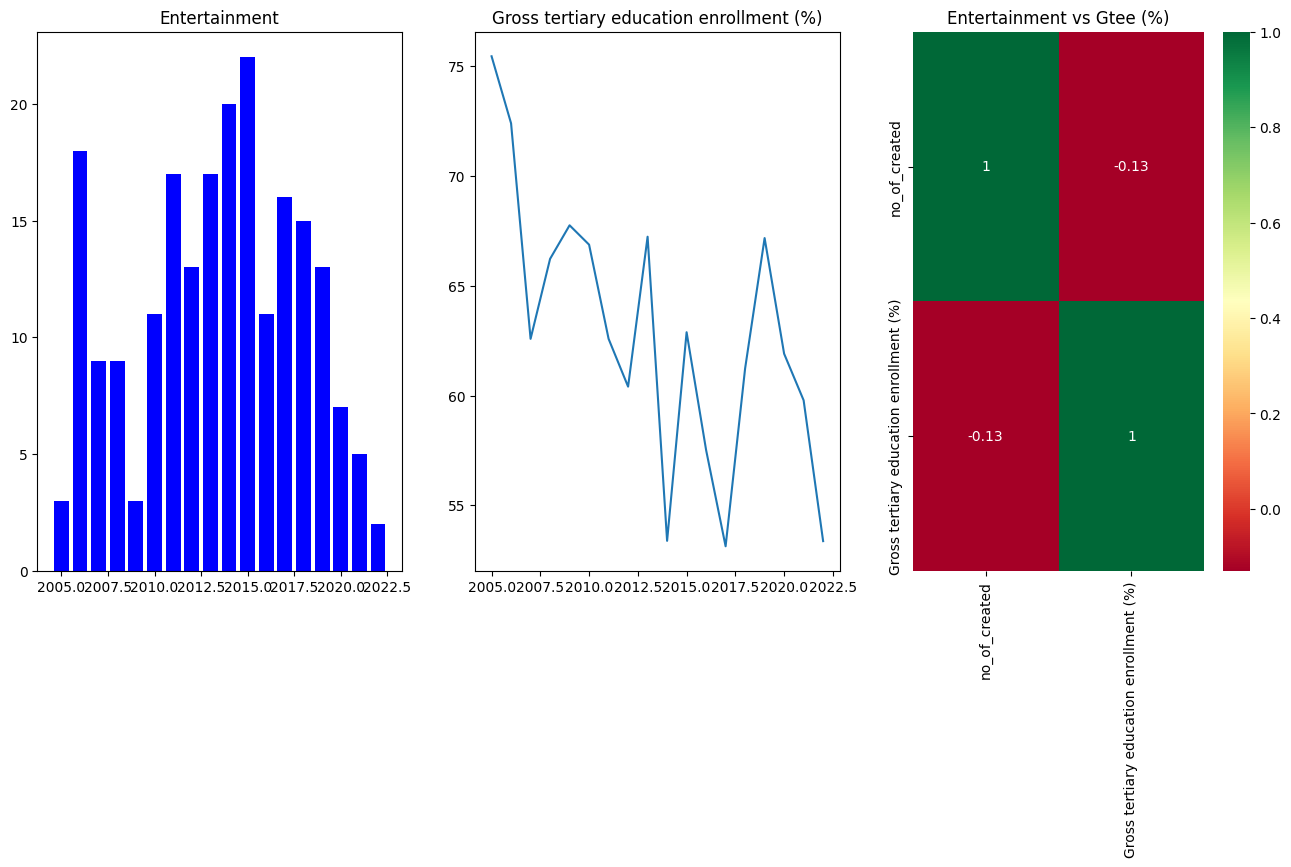

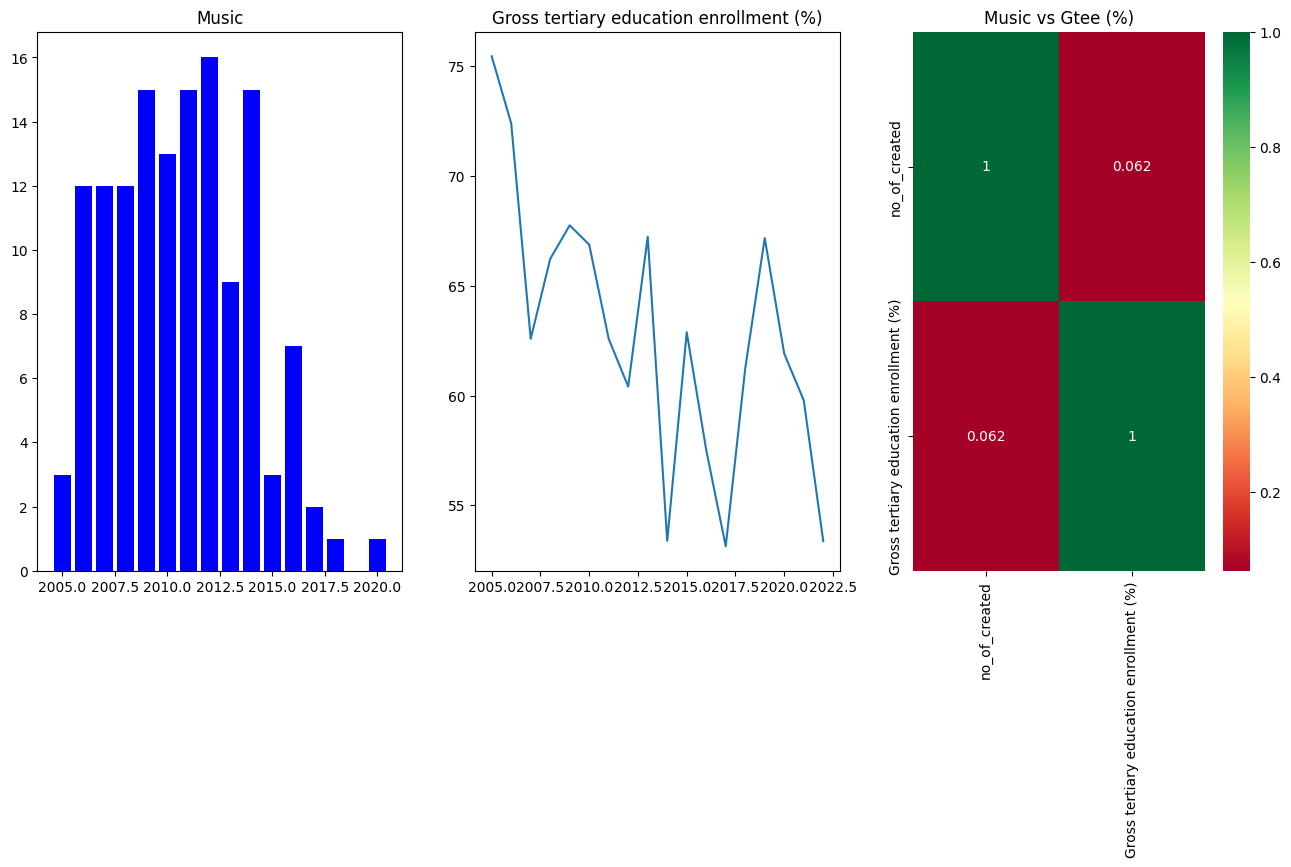

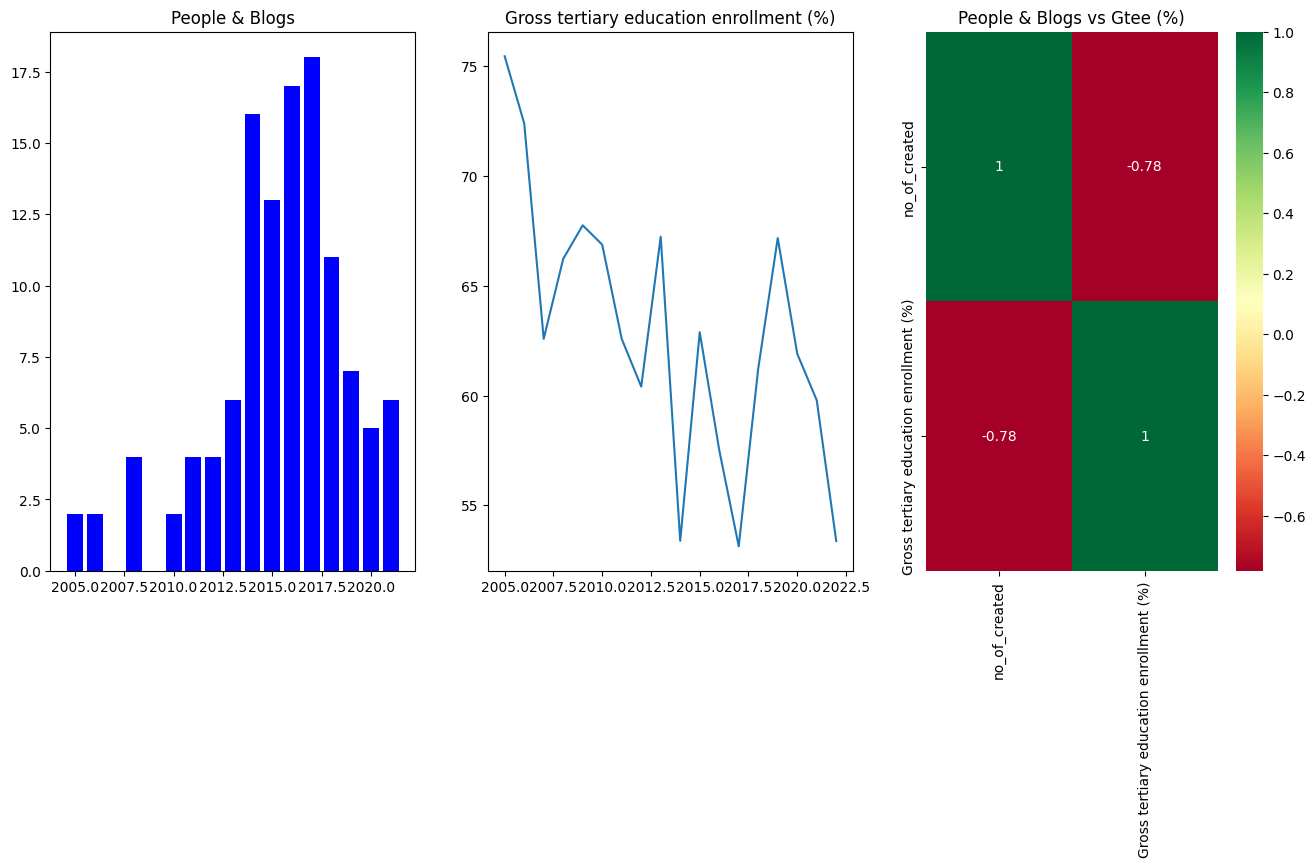

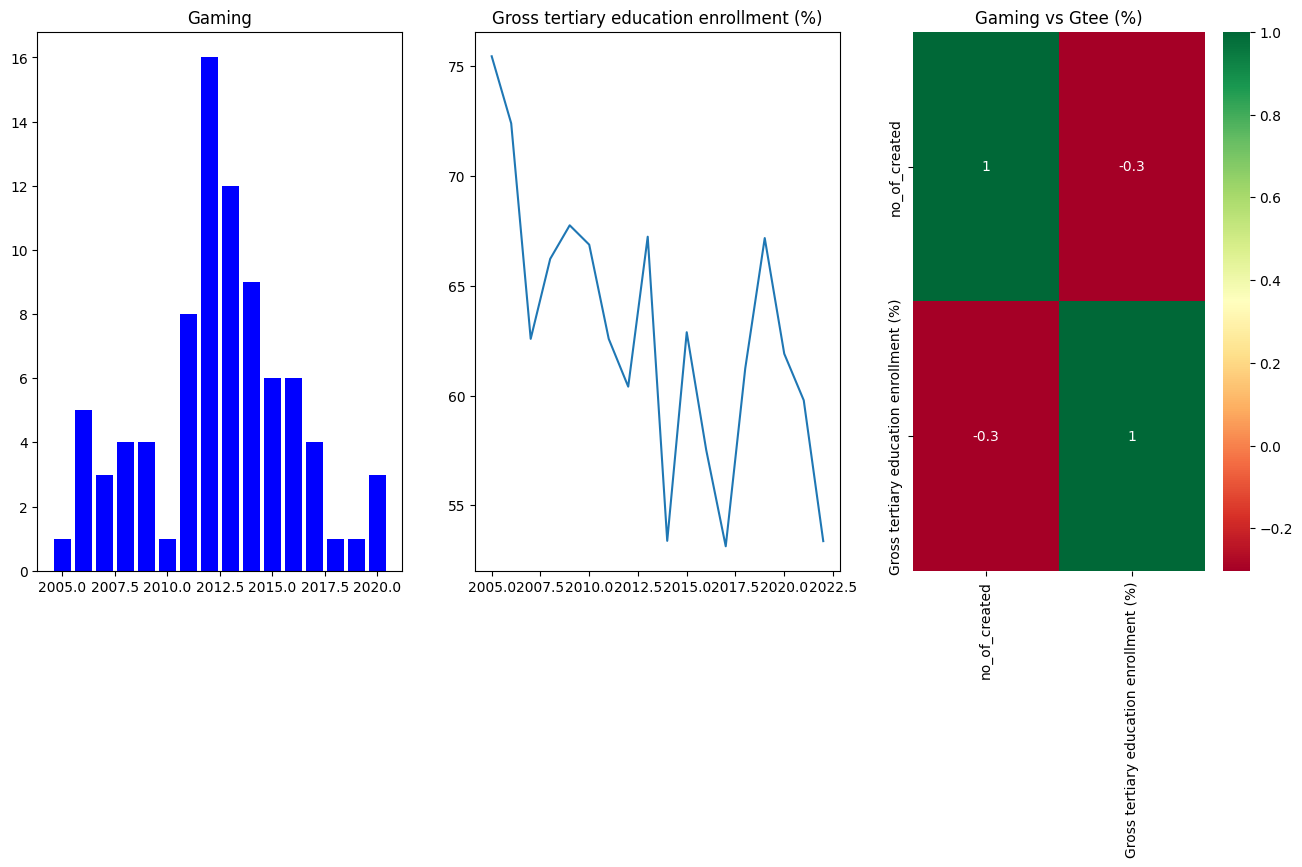

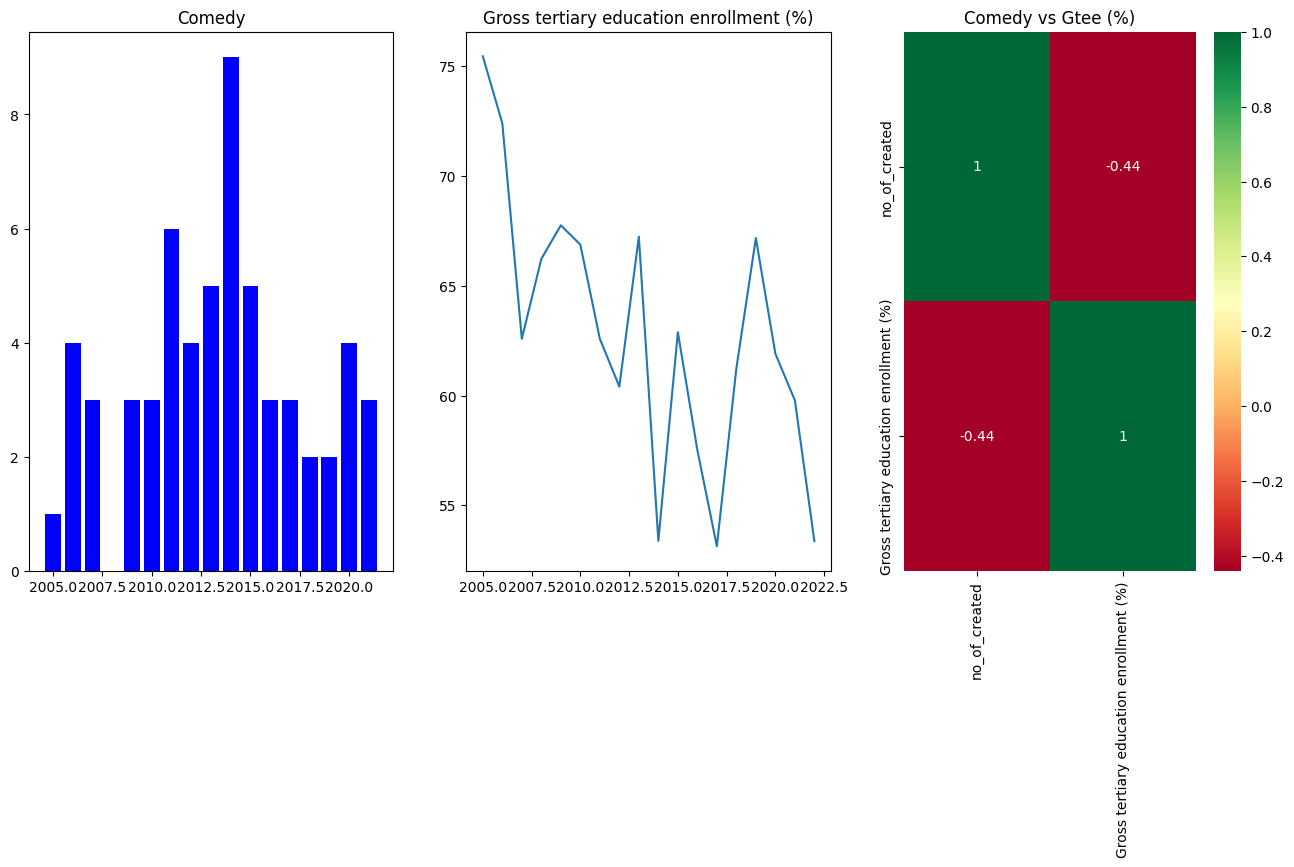

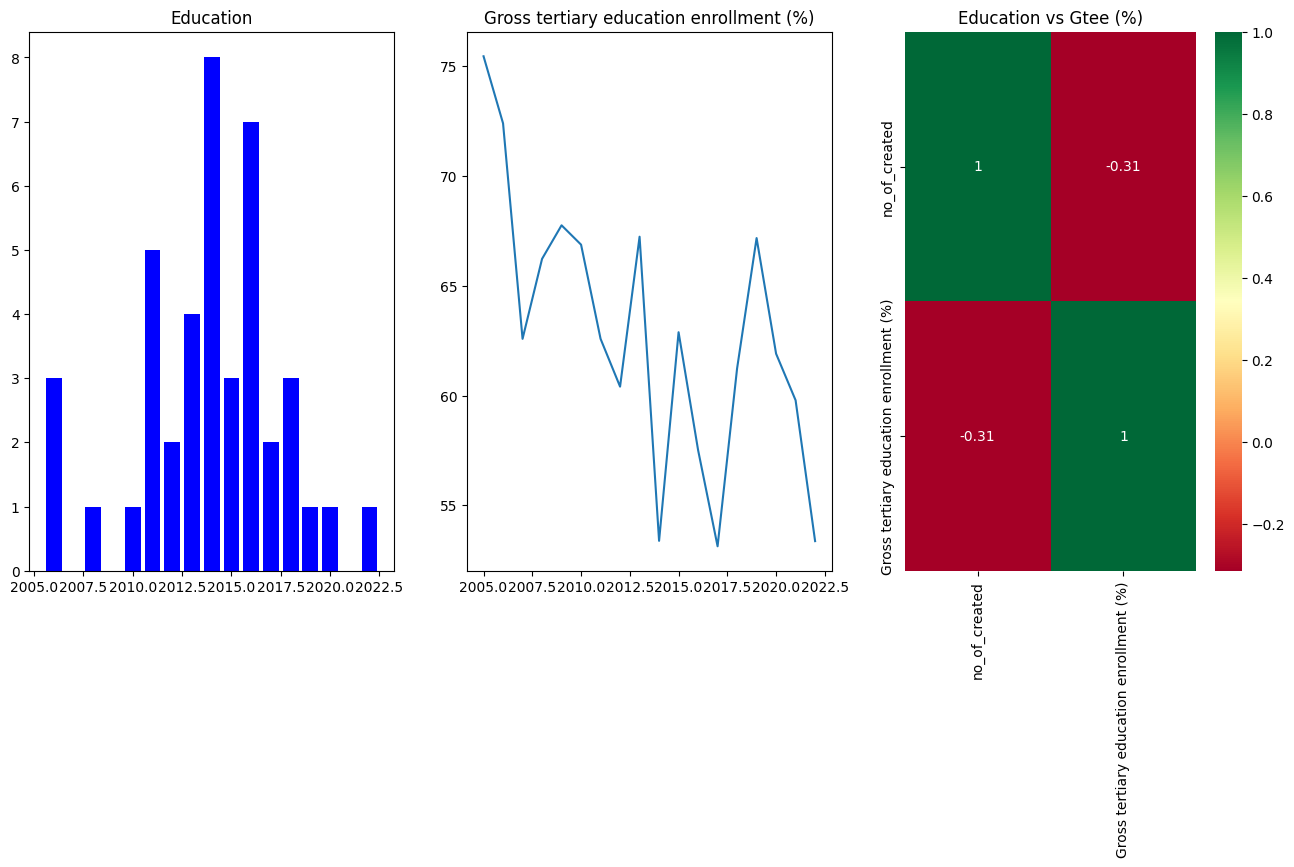

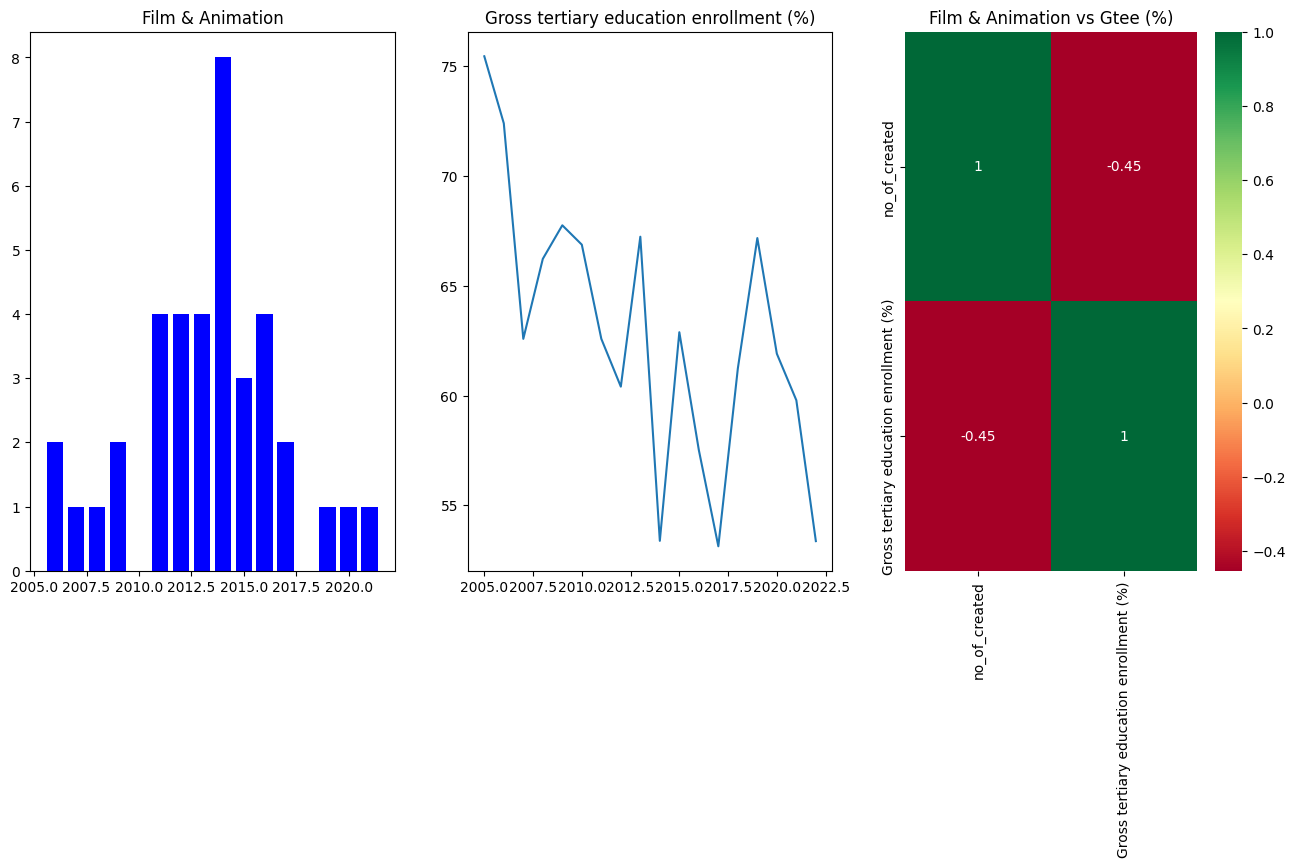

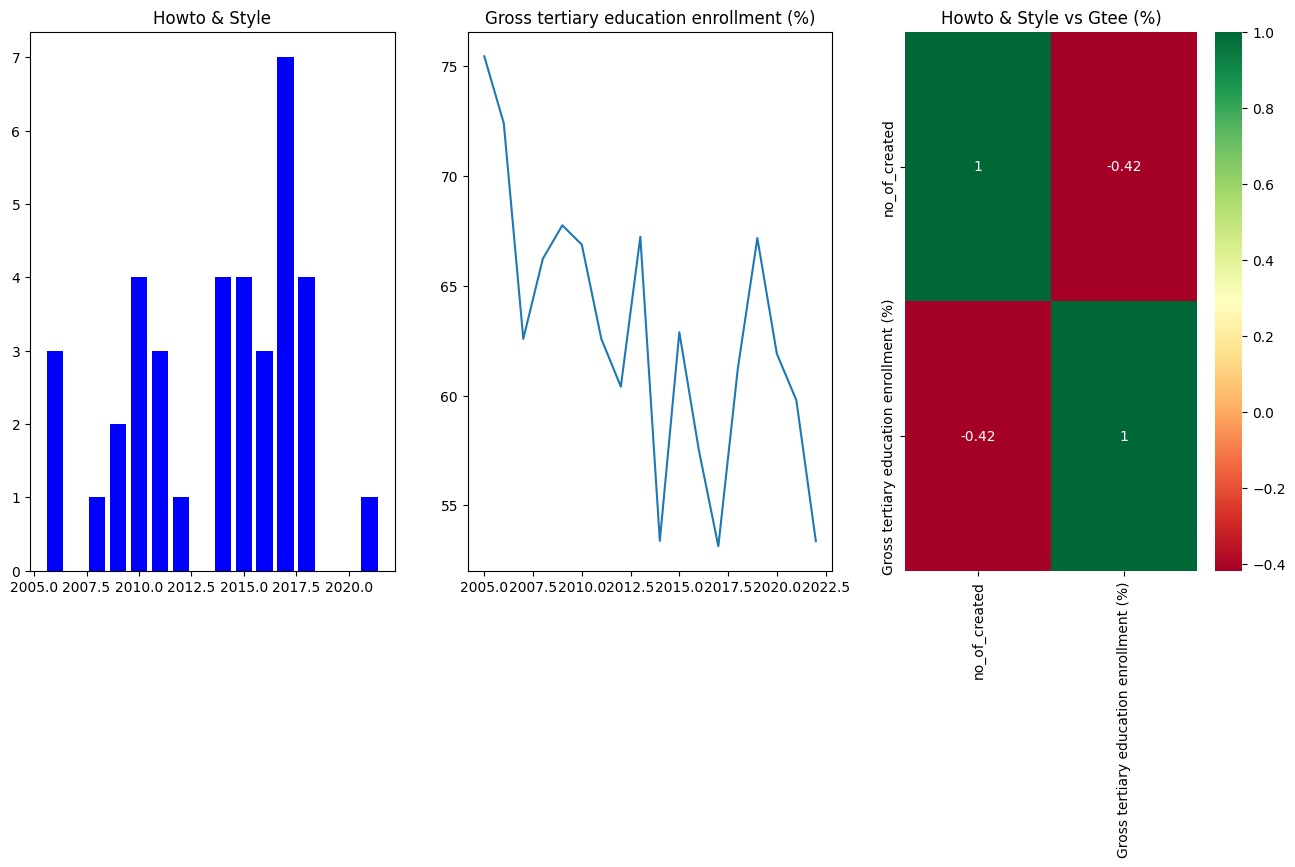

In [ ]:
for val in best_cat:
    plt.figure(figsize=(16,7))
    data_f = category_with_world_event[category_with_world_event.category==val].copy()
    plt.subplot(1,3,1)
    plt.bar(data_f.created_year,data_f.no_of_created,label=val,color='blue')
    plt.title(val)
    plt.subplot(1,3,2)
    plt.plot(category_with_world_event.created_year,category_with_world_event['Gross tertiary education enrollment (%)'])
    plt.title('Gross tertiary education enrollment (%)')
    plt.subplot(1,3,3)
    d=data_f[['no_of_created','Gross tertiary education enrollment (%)']].corr(numeric_only=True)
    sns.heatmap(d, annot = True, cmap = "RdYlGn")
    plt.title(f'{val} vs Gtee (%)')
    plt.show()

From the above graph it is clear that:
1. The popularity of the **People & Blogs category** is **negatively correlated** with the **Gross tertiary education enrollment (%)**.
2.The popularity of the **Gaming category** is **negatively correlated** with the **Gross tertiary education enrollment (%)**.
3. The popularity of the **Comedy category** is **negatively correlated** with the **Gross tertiary education enrollment (%)**.
4. The popularity of the **Education category** is **negatively correlated** with the **Gross tertiary education enrollment (%)**.
5. The popularity of the **Film & Animation categor**y is **negatively correlated** with the **Gross tertiary education enrollment (%)**.

6. The popularity of the **Howto & Style category** is **negatively correlated** with the **Gross tertiary education enrollment (%)**.

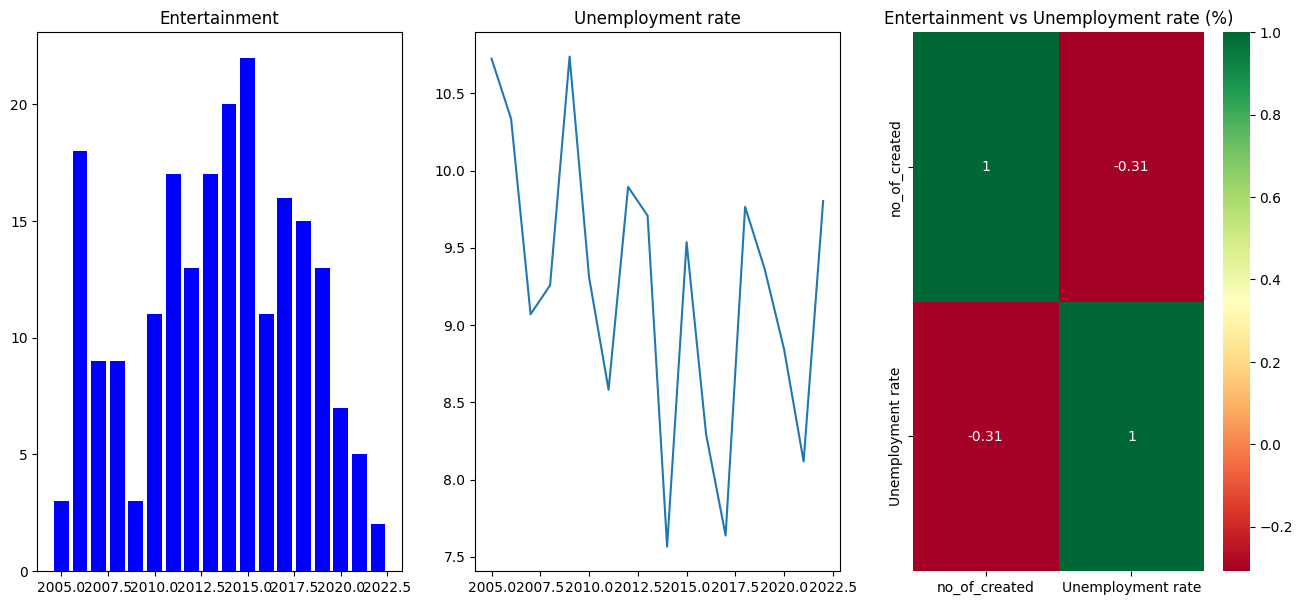

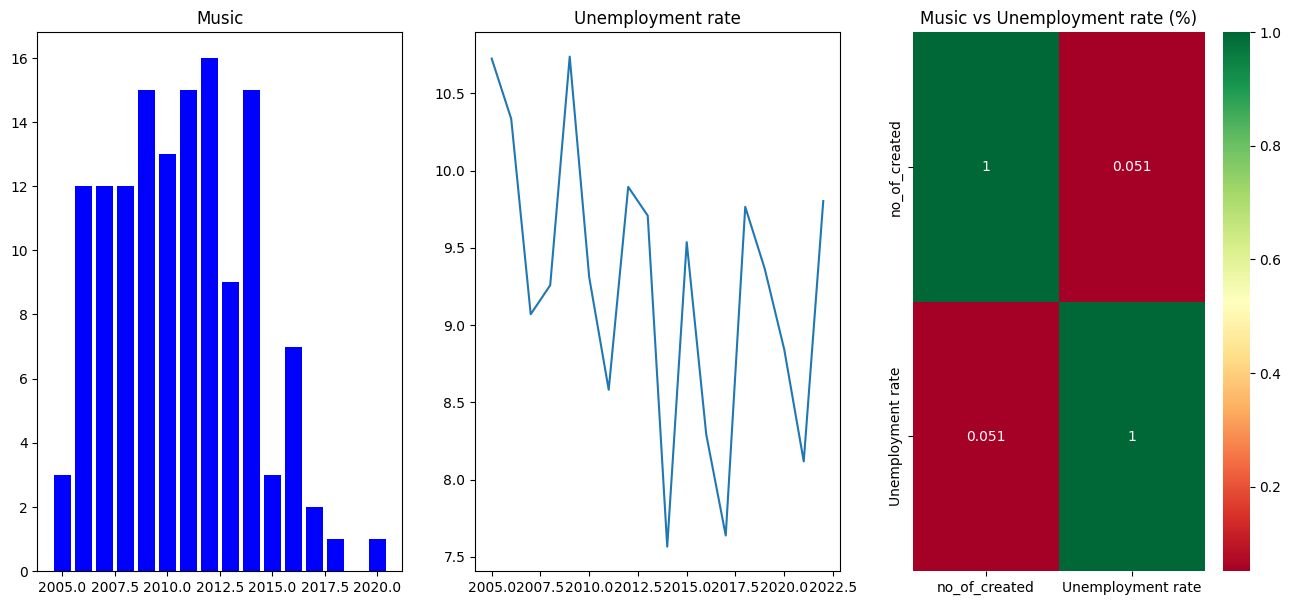

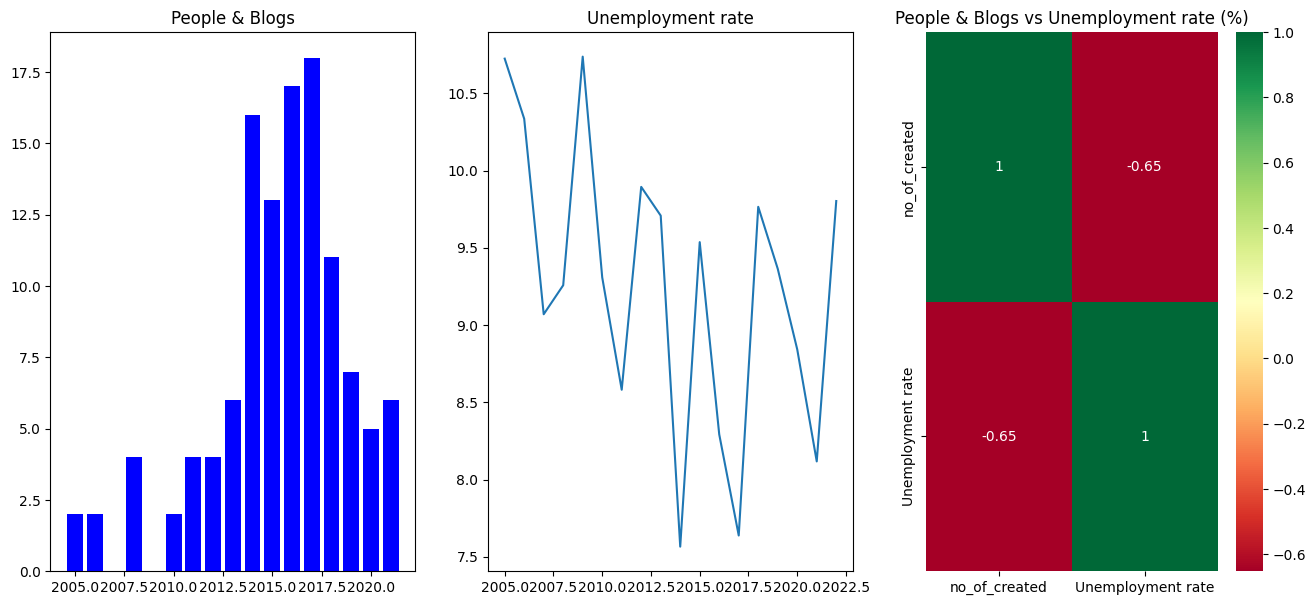

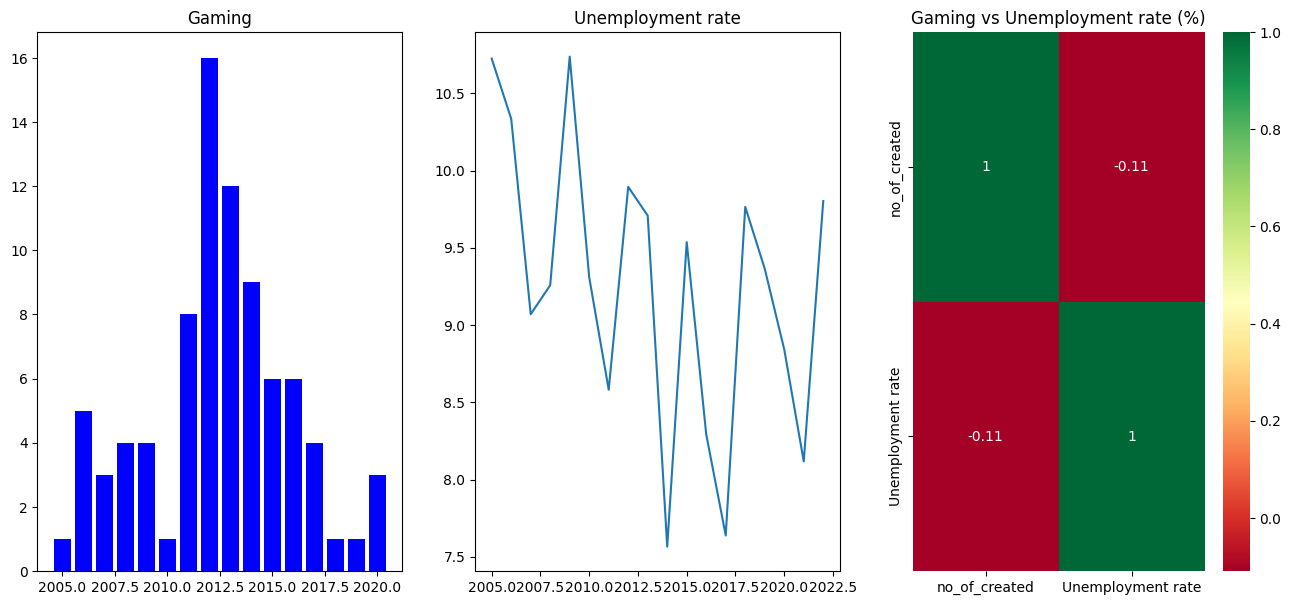

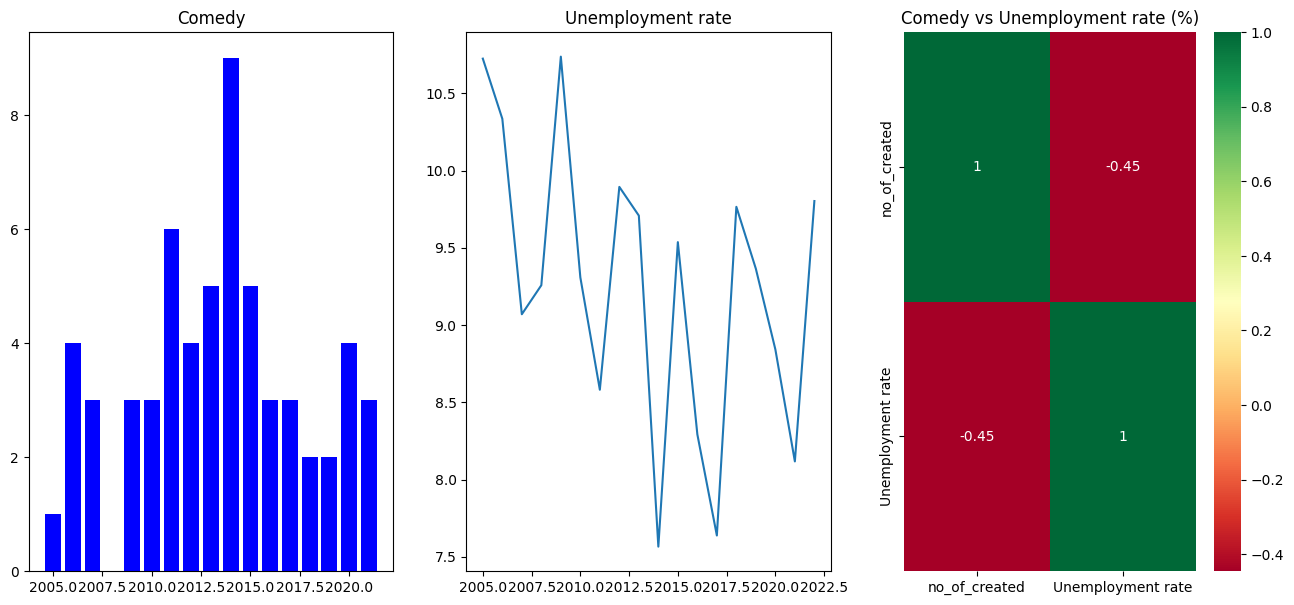

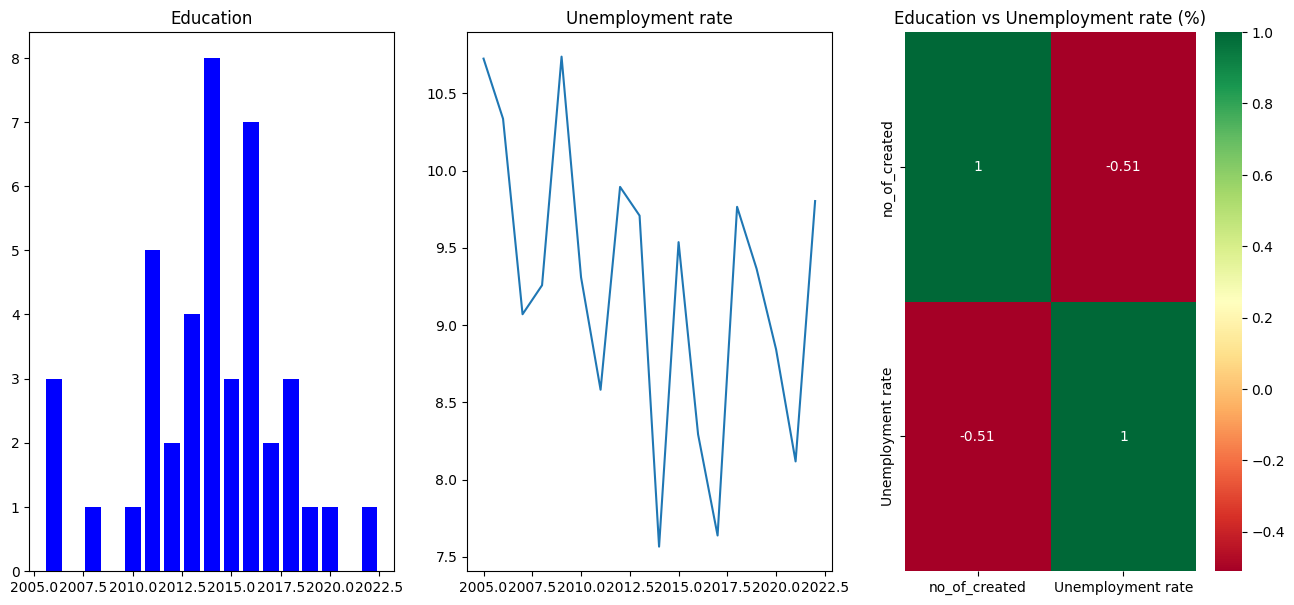

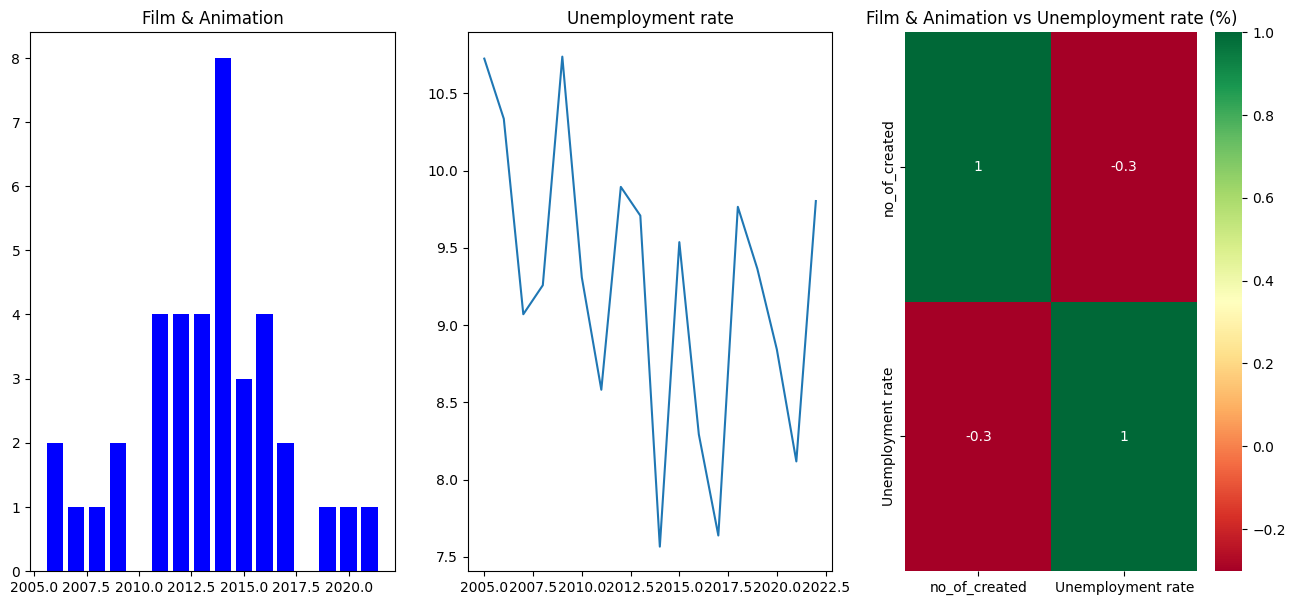

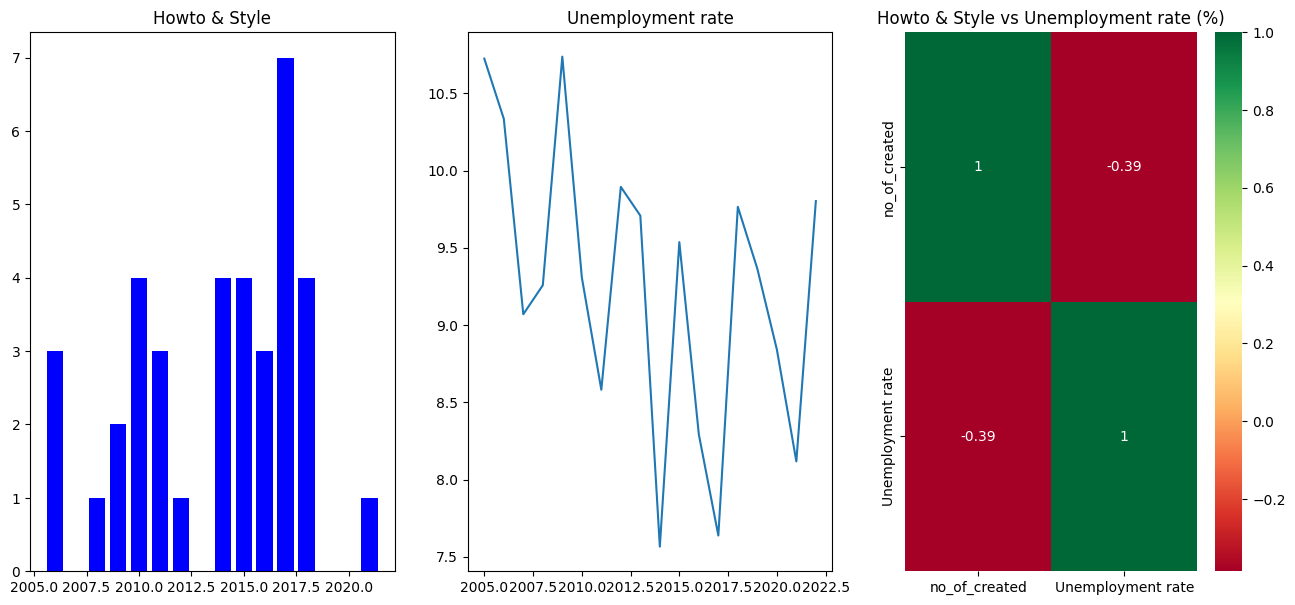

In [ ]:
for val in best_cat:
    plt.figure(figsize=(16,7))
    data_f = category_with_world_event[category_with_world_event.category==val].copy()
    plt.subplot(1,3,1)
    plt.bar(data_f.created_year,data_f.no_of_created,label=val,color='blue')
    plt.title(val)
    plt.subplot(1,3,2)
    plt.plot(category_with_world_event.created_year,category_with_world_event['Unemployment rate'])
    plt.title('Unemployment rate')
    plt.subplot(1,3,3)
    d=data_f[['no_of_created','Unemployment rate']].corr(numeric_only=True)
    sns.heatmap(d, annot = True, cmap = "RdYlGn")
    plt.title(f'{val} vs Unemployment rate (%)')
    plt.show()

From the above graph it is clear that:
1. The popularity of the **Entertainment category** is **negatively correlated** with the **Unemployment rate (%)**.
2. The popularity of the **People & Blogs** is **negatively correlated** with the **Unemployment rate (%)**.
3. The popularity of the **Comedy category** is **negatively correlated** with the **Unemployment rate (%)**.
4. The popularity of the **Education category** is **negatively correlated** with the **Unemployment rate (%)**.
5. The popularity of the **Film & Animation category** is **negatively correlated** with the **Unemployment rate (%)**.
6. The popularity of the **Howto & Style category** is **negatively correlated** with the **Unemployment rate (%)**.

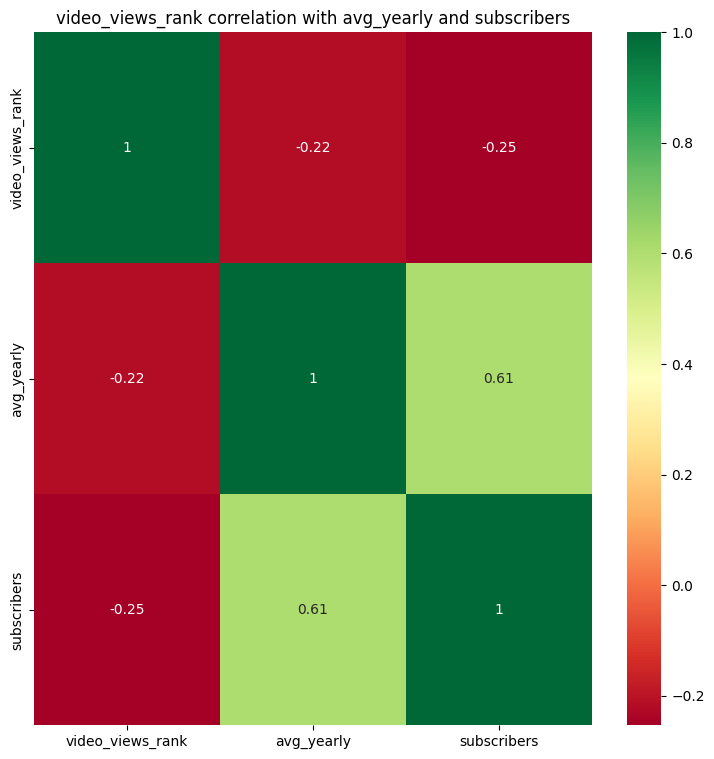

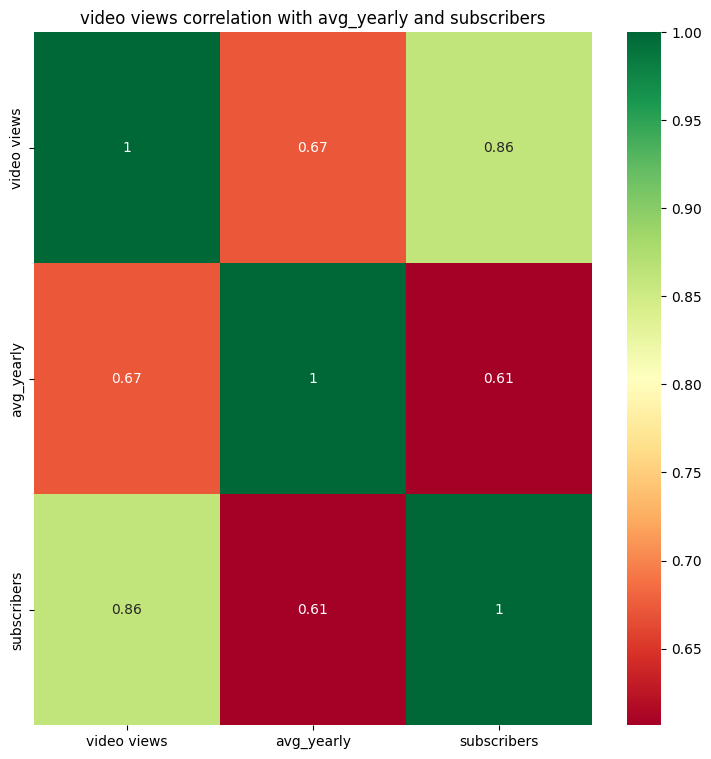

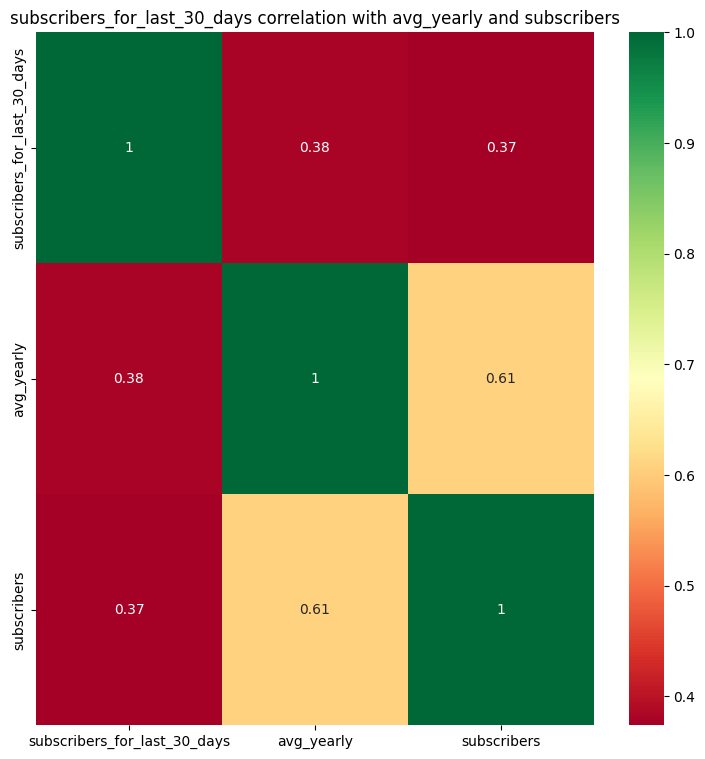

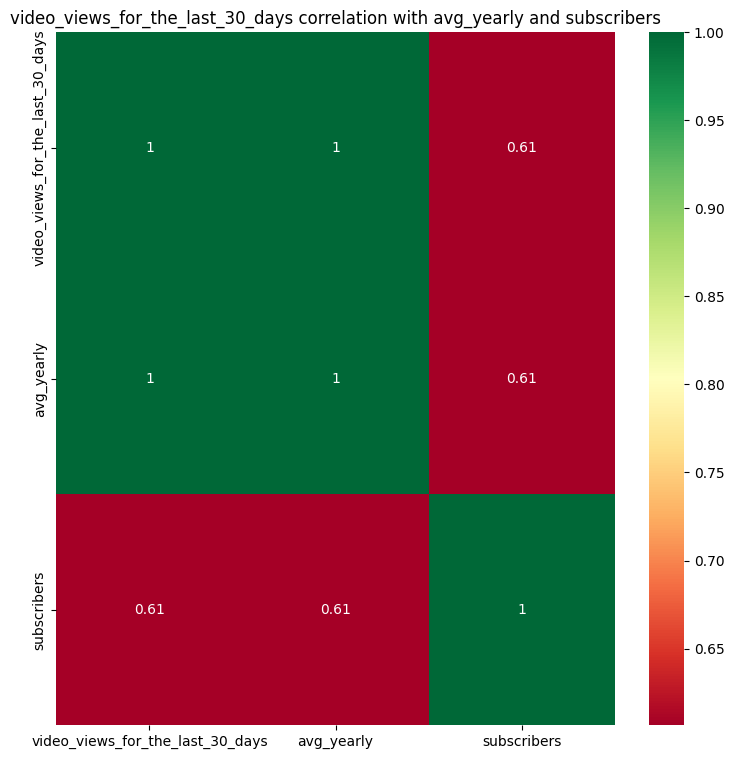

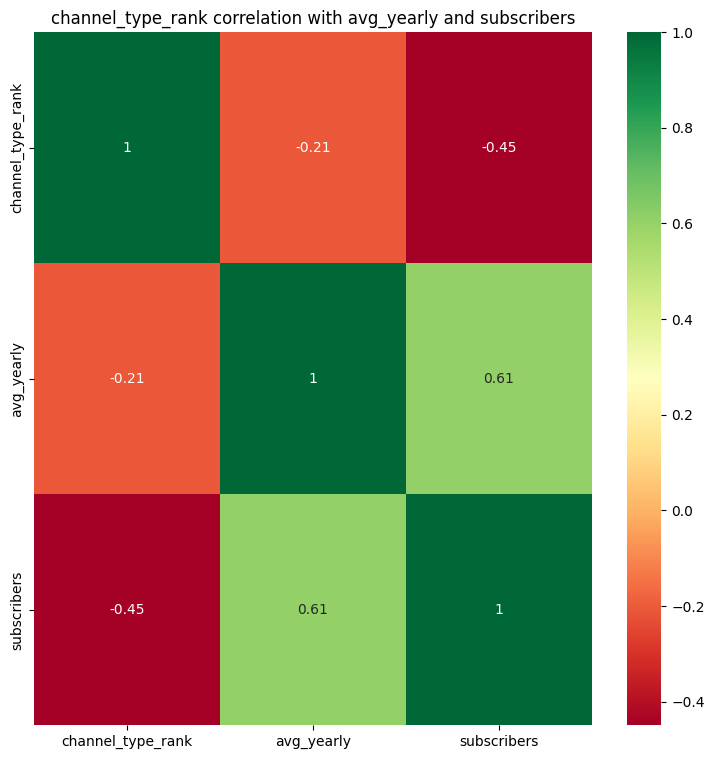

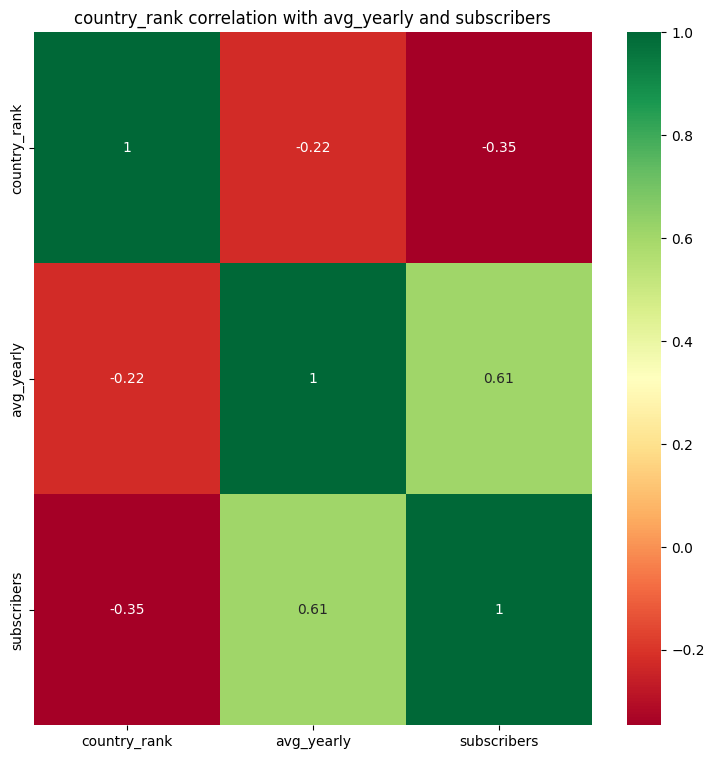

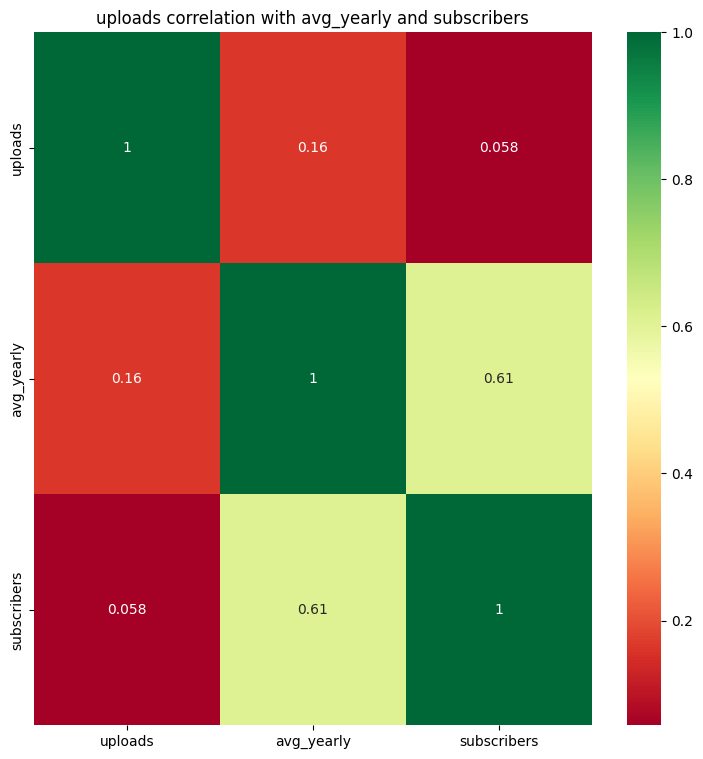

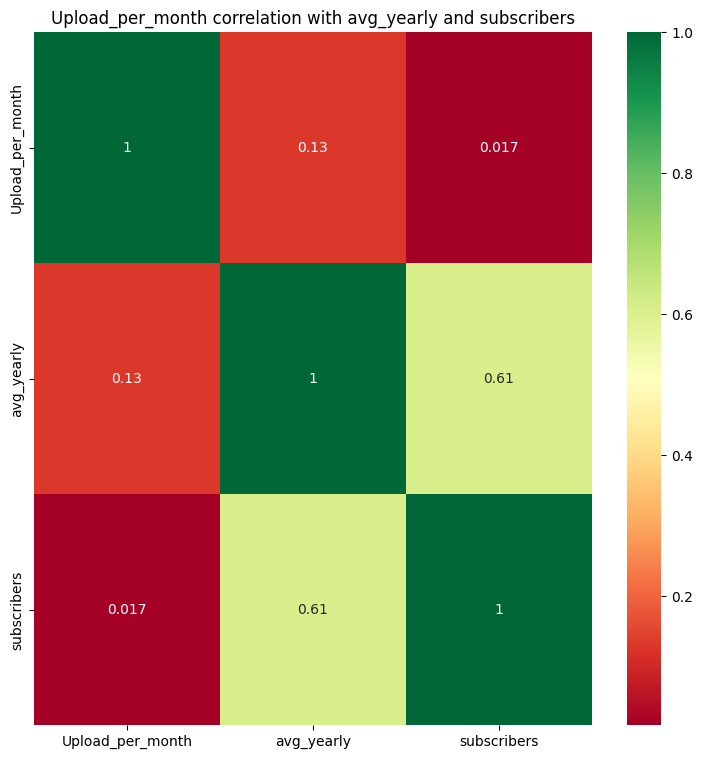

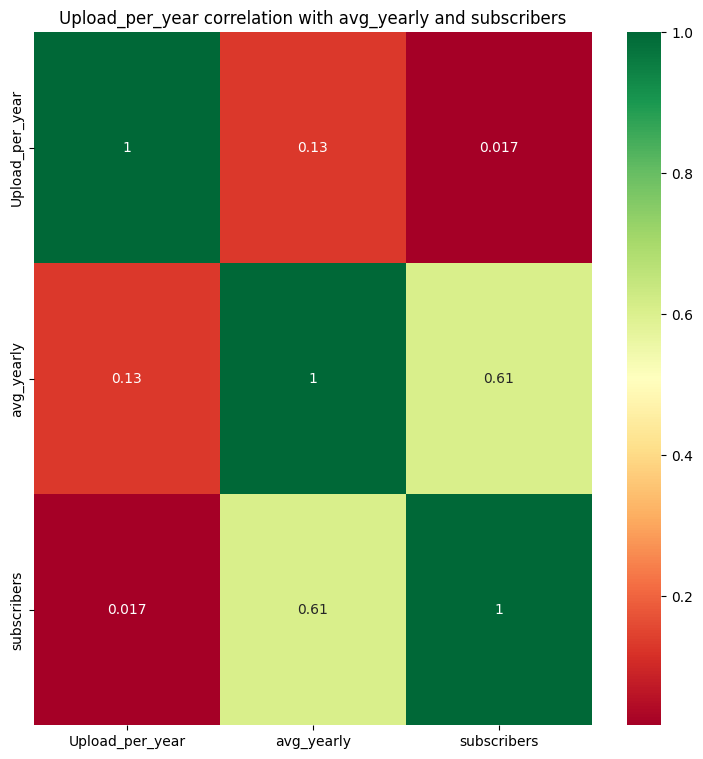

In [ ]:
corr_list=['video_views_rank','video views','subscribers_for_last_30_days','video_views_for_the_last_30_days','channel_type_rank','country_rank','uploads','Upload_per_month','Upload_per_year']
for val in corr_list:
    plt.figure(figsize = (9,9))
    sns.heatmap(successful_youtuber[[val,'avg_yearly','subscribers']].corr(numeric_only=True), annot = True, cmap = "RdYlGn")
    plt.title(f'{val} correlation with avg_yearly and subscribers')
    plt.show()

A **Successful Youtuber** with **Good Subscribers Base** and **a Good Average Yearly Income** has the following qualities:
1. The **Average Yearly Income** is **positively correlated** with **Subscribers Base**.
2. **video views** are **highly correlated** to **Subscribers Base** and **Average Yearly Income** with **positive value**.
3.  **subscribers_for_last_30_days** **positively correlated** with **Average Yearly Income**.
4. **video_views_for_the_last_30_days** is **highly correlated** to **Subscribers Base** and **Average Yearly Income**.
5. **channel_type_rank** and **country_rank** both are **negatively correlated** with **Average Yearly Income**.